# Data Preparation

Tareas por realizar en la etapa de preparacion:

- Seleccion de datos relevantes
- limpieza de los datos (missing values, outliers)
- Construir nuevas variables (feature engineering)
- Integrar datos de múltiples fuentes
- Formatear y transformar datos

Algunas tareas a tomar en cuenta

- Completando los valores faltantes restantes con ceros

- Añadiendo las siguientes categorías a los datos mediante las funciones creadas anteriormente.

- Las siguientes funciones se utilizan para obtener los valores redondeados de diferentes columnas.

- Renombrar columnas

In [115]:
%load_ext kedro.ipython 
catalog.keys()

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython



[
    'preprocess_fifa_22',
    'preprocess_fifa_21',
    'preprocess_fifa_20',
    'parameters',
    'DataSetFIFA22',
    'DataSetFIFA21',
    'DataSetFIFA20'
]

In [116]:
FIFA22_df = catalog.load("DataSetFIFA22")
FIFA21_df = catalog.load("DataSetFIFA21")
FIFA20_df = catalog.load("DataSetFIFA20")

[10/21/25 23:53:40] INFO     Loading data from DataSetFIFA22 (CSVDataset)...                   ]8;id=585453;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=927263;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

[10/21/25 23:53:41] INFO     Loading data from DataSetFIFA21 (CSVDataset)...                   ]8;id=930938;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=917588;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from DataSetFIFA20 (CSVDataset)...                   ]8;id=564258;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=184966;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **Seleccion de datos relevantes**

### **Columnas eliminadas**

Identificadores / texto libre / URLs:
ID, Name, Photo, Flag, Club Logo. No aportan 

In [118]:
FIFA22_df.drop(columns=['Photo'], inplace=True)
FIFA22_df.drop(columns=['Flag'], inplace=True)
FIFA22_df.drop(columns=['Club Logo'], inplace=True)
FIFA22_df.drop(columns=['Real Face'], inplace=True)

#### **Eliminación de la columna `Loaned From`**

Si bien la columna `Loaned From`podría ser imputada con valores como “No Loan” o “Sin préstamo”, al comparar la cantidad de datos faltantes con el total del dataframe, se observa que esta característica contiene muy pocos valores registrados. Por ello, su imputación podría introducir sesgos en el análisis, ya que la mayoría de los jugadores no se encuentran en condición de préstamo. En consecuencia, se decidió eliminar esta columna del conjunto de datos.

In [119]:
##Columnas con una gran cantidad de valores nulos. 
FIFA22_df.drop(columns=['Loaned From'], inplace=True)

### **Eliminacion de datos outliers**
Este proceso se repite para los dataframe FIFA22,21 y 20

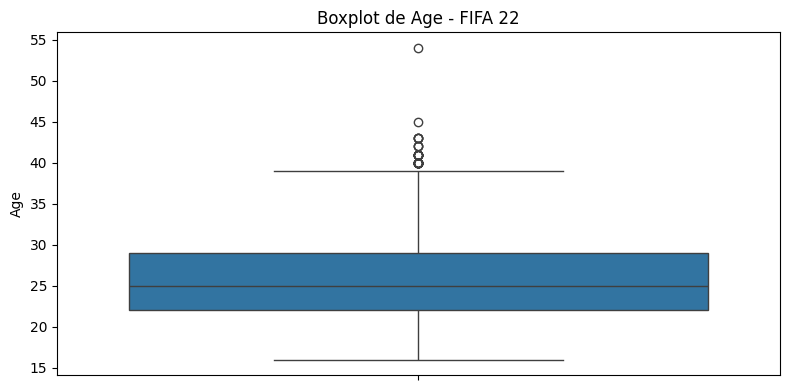

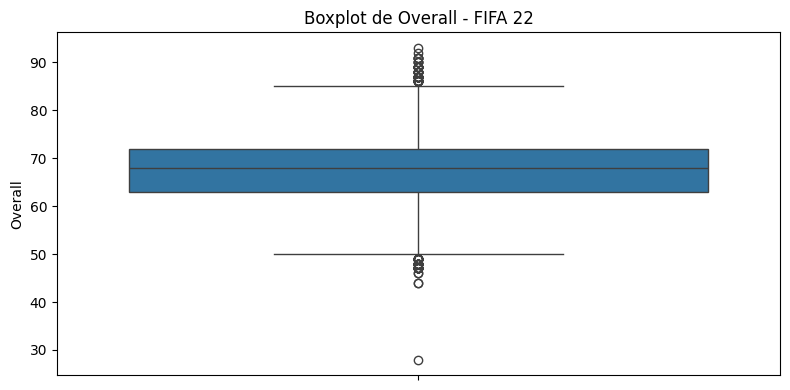

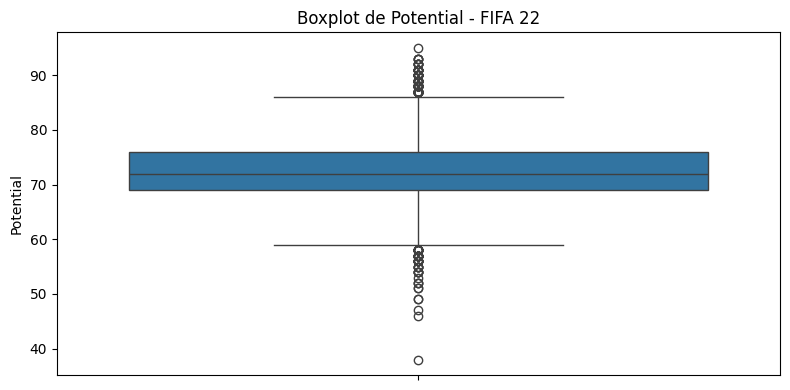

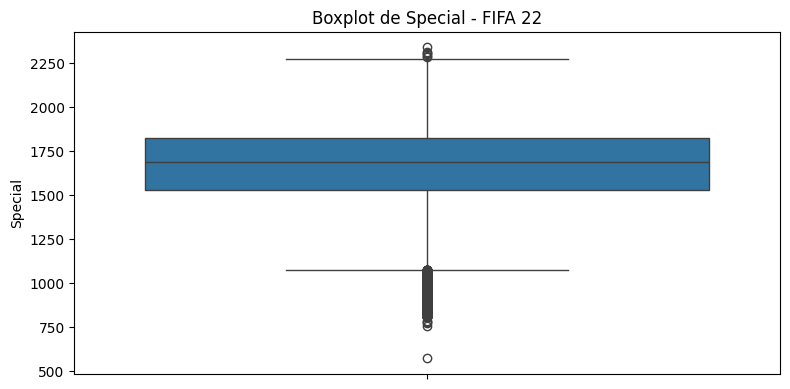

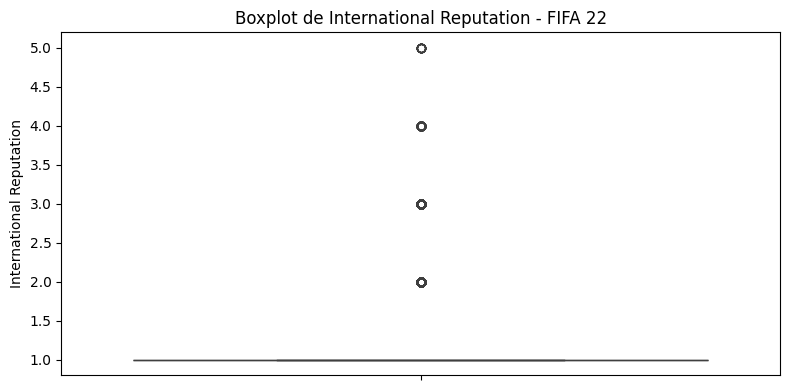

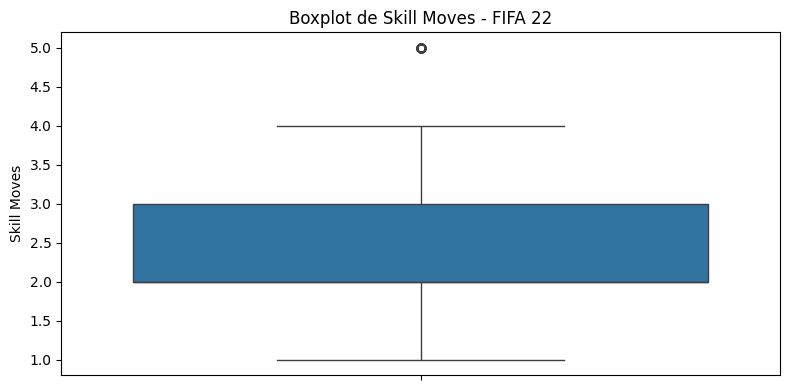

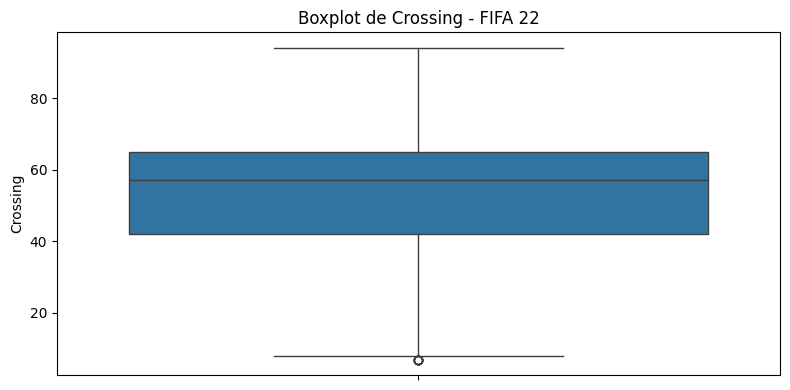

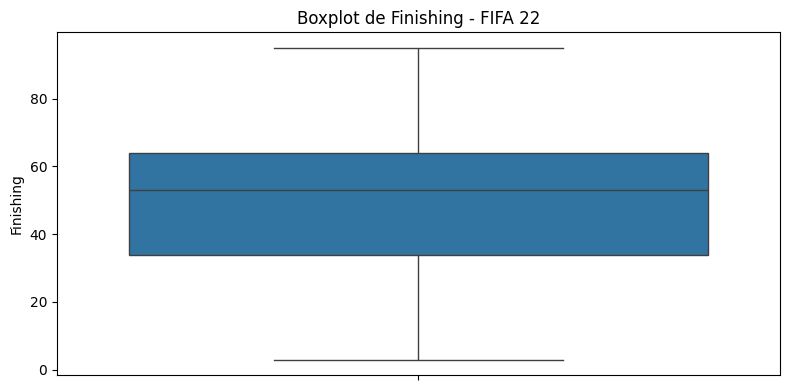

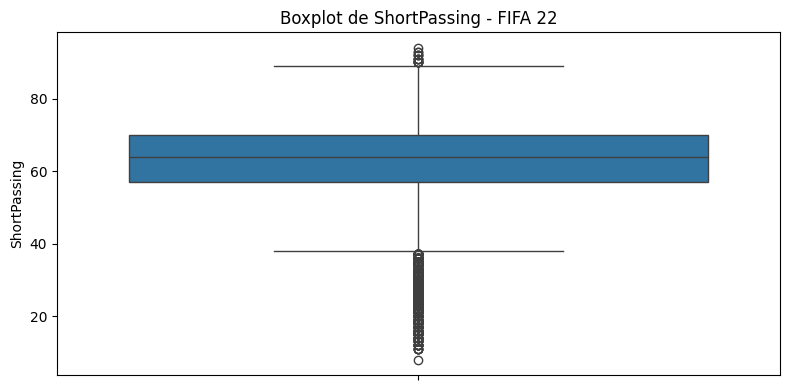

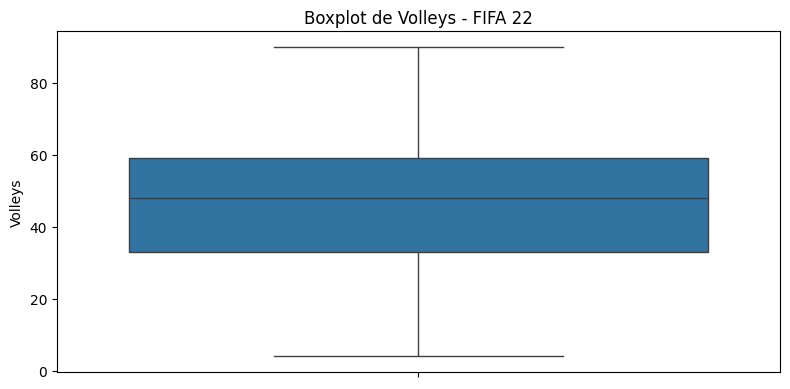

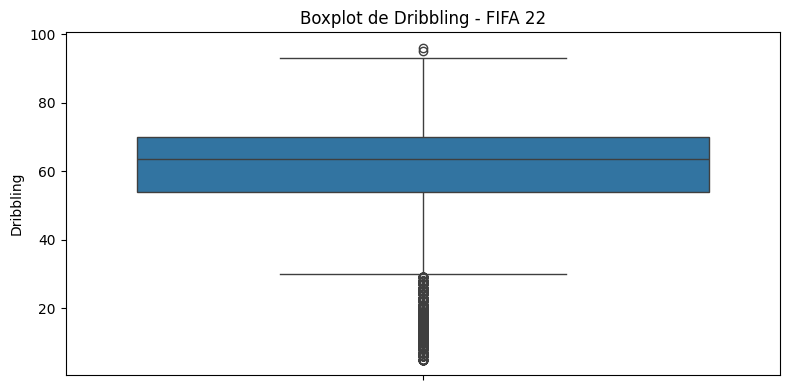

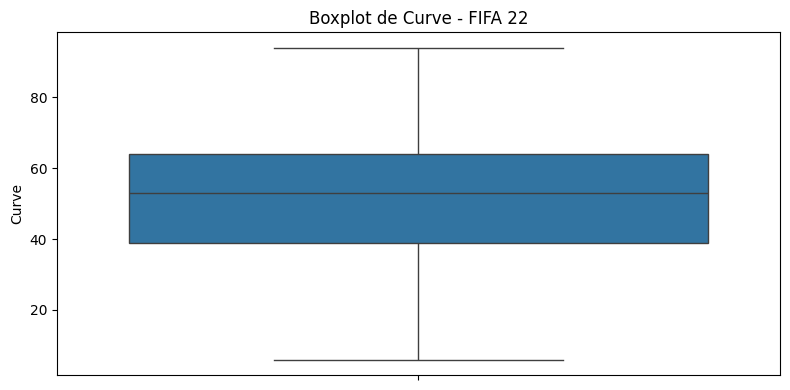

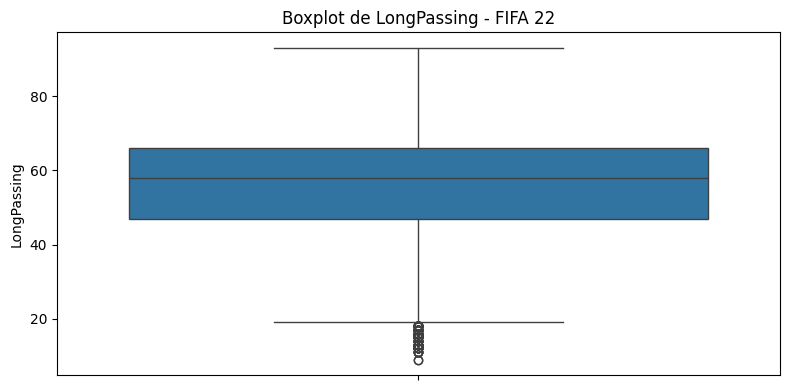

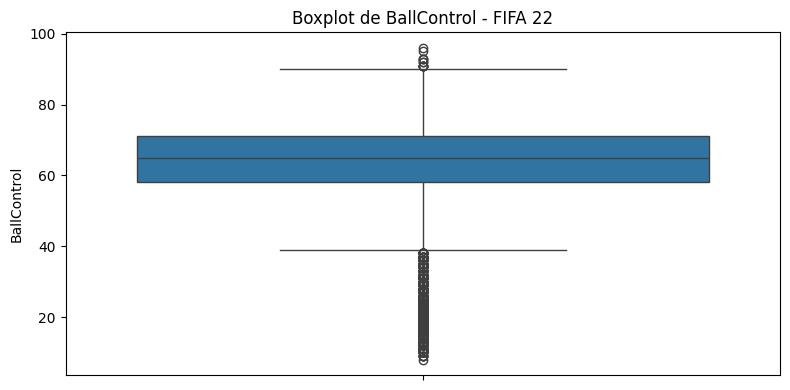

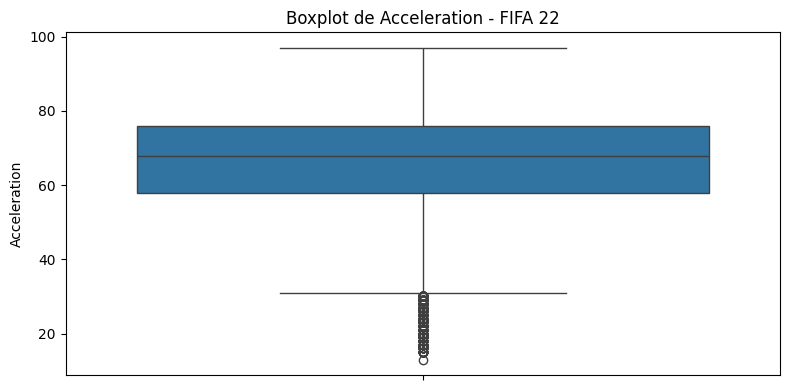

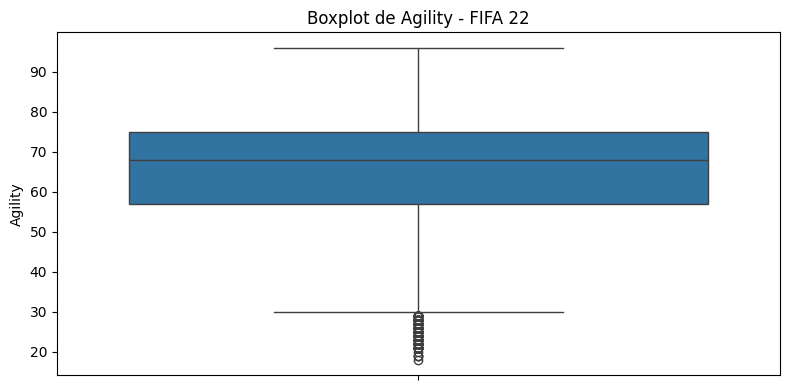

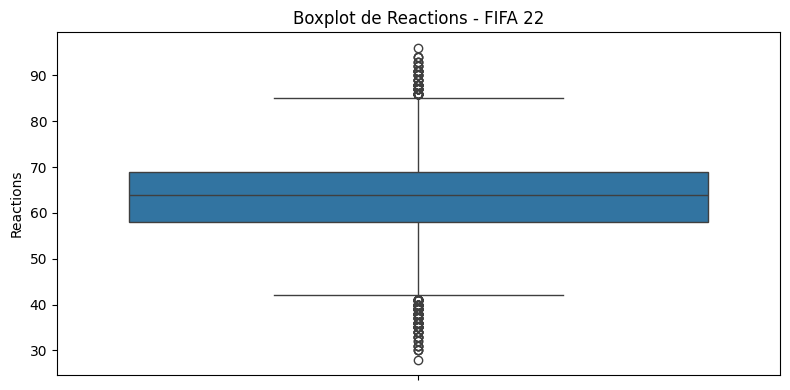

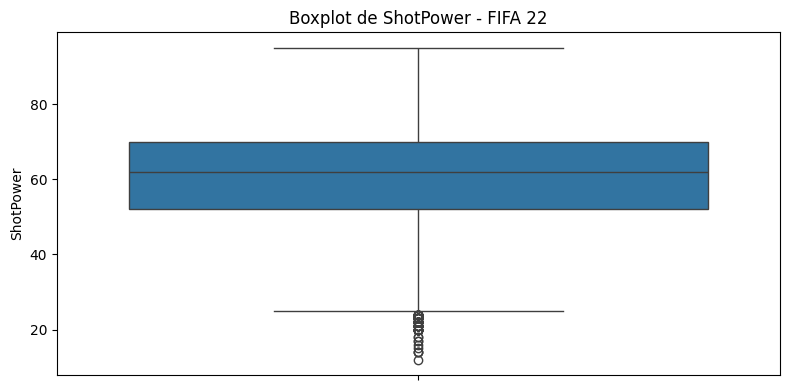

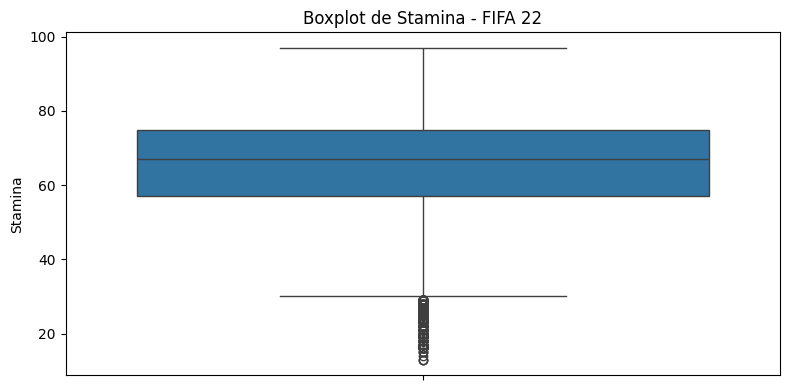

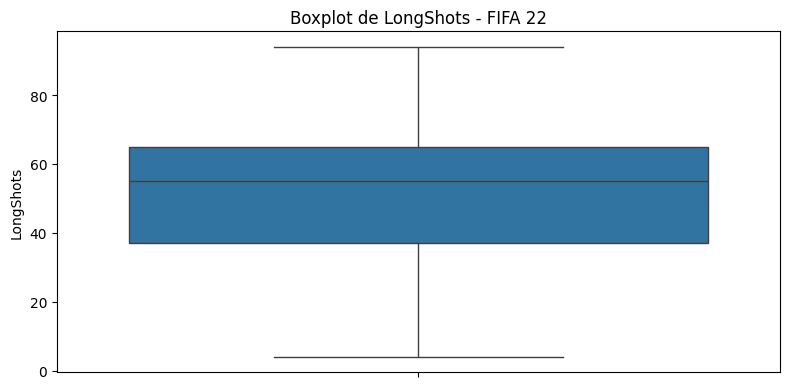

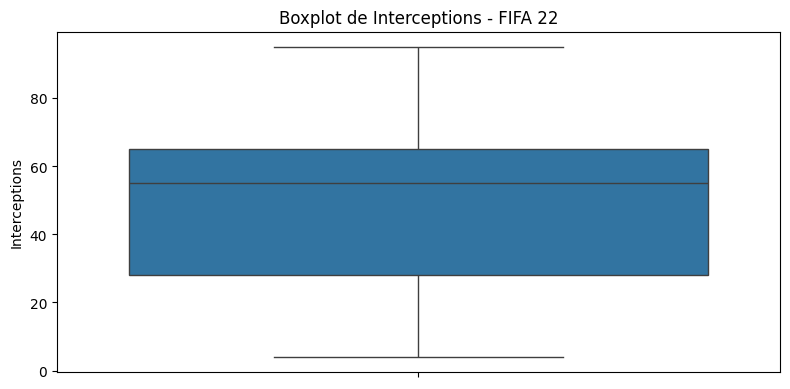

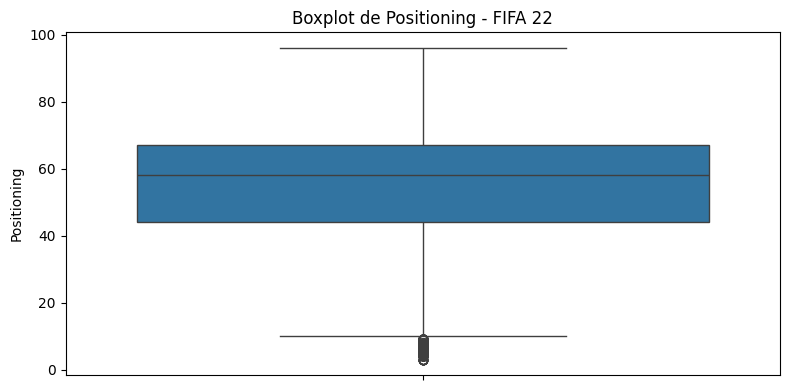

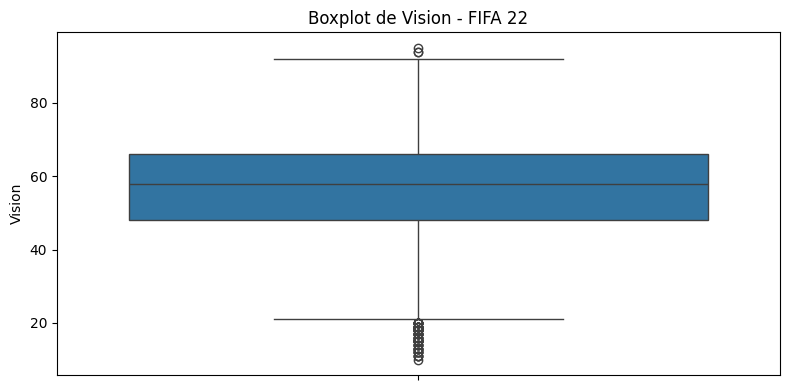

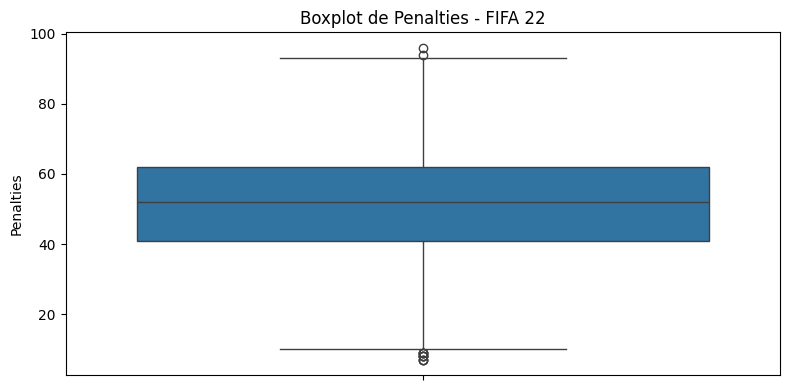

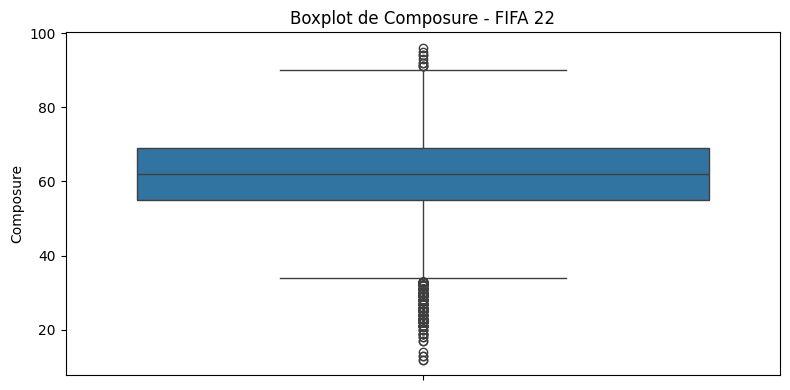

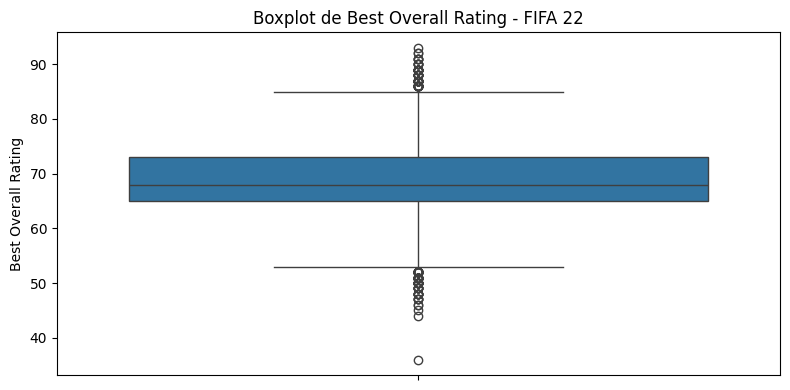

In [120]:
predictors = [
    'Age', 'Overall', 'Potential', 'Special', 'International Reputation',
    'Skill Moves', 'Crossing', 'Finishing', 'ShortPassing', 'Volleys',
    'Dribbling', 'Curve', 'LongPassing', 'BallControl', 'Acceleration',
    'Agility', 'Reactions', 'ShotPower', 'Stamina', 'LongShots',
    'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
    'Best Overall Rating', 'offensive_skills', 'Wage_num', 'Release Clause_num'
]

def plot_only_boxplots(df, year_label):
    predictors_exist = [col for col in predictors if col in df.columns]

    for col in predictors_exist:
        plt.figure(figsize=(8, 4))
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot de {col} - FIFA {year_label}')
        plt.tight_layout()
        plt.show()
plot_only_boxplots(FIFA22_df, "22")

Segun el contexto de cada caracteristica, se mantienen, se pulen o se eliminan valores atipicos.

In [121]:
#AGE: se eliminan jugadores >=39
FIFA22_df.drop(FIFA22_df[FIFA22_df['Age'] >=39 ].index, inplace=True)   
FIFA22_df.drop(FIFA22_df[FIFA22_df['Overall'] <32 ].index, inplace=True)
#FIFA22_df.drop(FIFA22_df[FIFA22_df['Skill Moves'] >=4.5 ].index, inplace=True) no se elimina
FIFA22_df.drop(FIFA22_df[FIFA22_df['Crossing'] <=7.0 ].index, inplace=True)
FIFA22_df.drop(FIFA22_df[FIFA22_df['Dribbling'] >=96.0 ].index, inplace=True)
#Se eliminan o se suaviza la eliminacion de datos atipicos en pases largos
#FIFA22_df.drop(FIFA22_df[FIFA22_df['LongPassing'] <= ].index, inplace=True) Sin eliminar 
#FIFA22_df.drop(FIFA22_df[FIFA22_df['BallControl'] >= ].index, inplace=True)Sin eliminar 
FIFA22_df.drop(FIFA22_df[FIFA22_df['Vision'] >=92.0 ].index, inplace=True)
FIFA22_df.drop(FIFA22_df[FIFA22_df['Penalties'] >=92.0].index, inplace=True)
FIFA22_df.drop(FIFA22_df[FIFA22_df['Penalties'] <= 8.0].index, inplace=True)
FIFA22_df.drop(FIFA22_df[FIFA22_df['Composure'] >= 91.0].index, inplace=True)
# No se eliminan valores para overall raiting

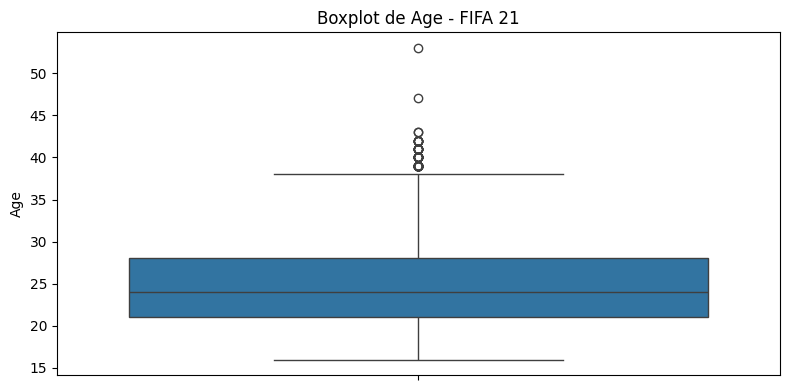

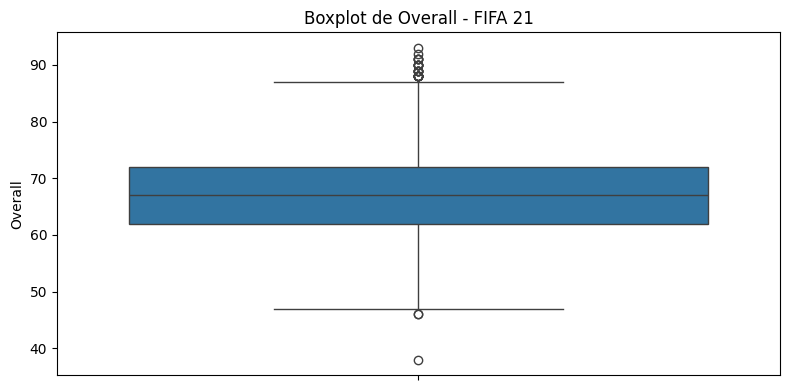

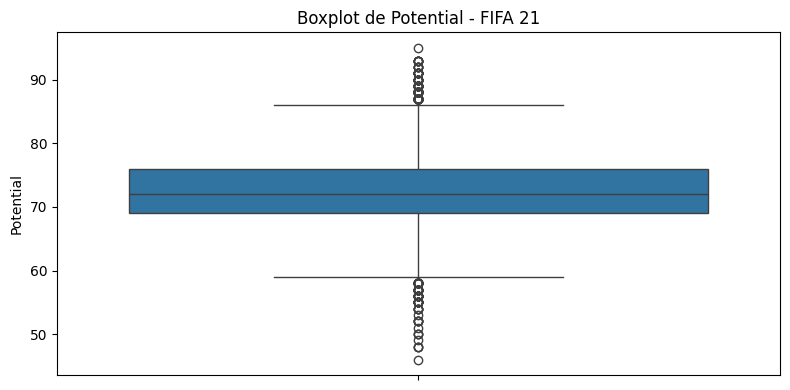

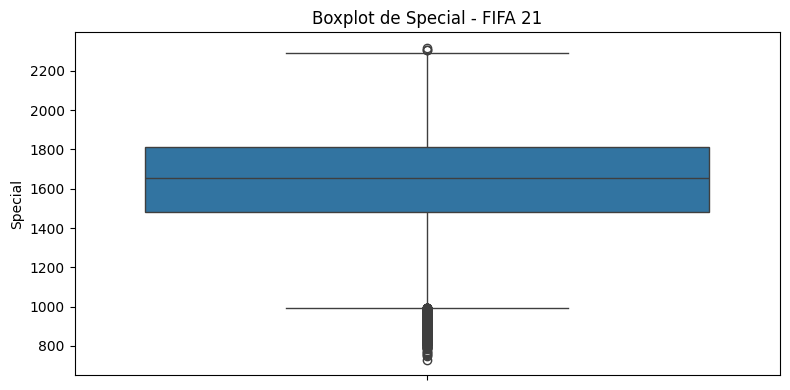

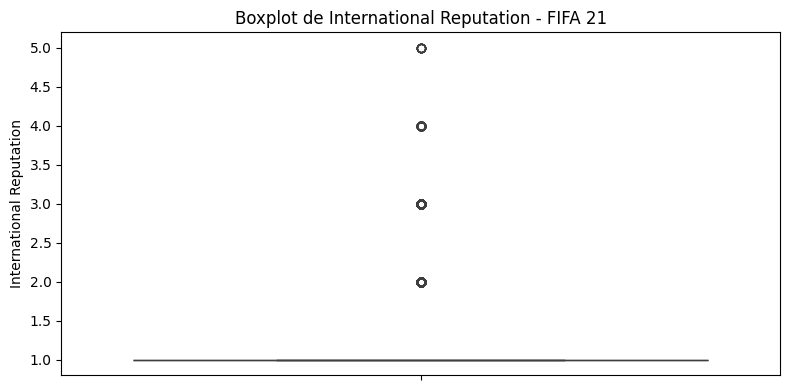

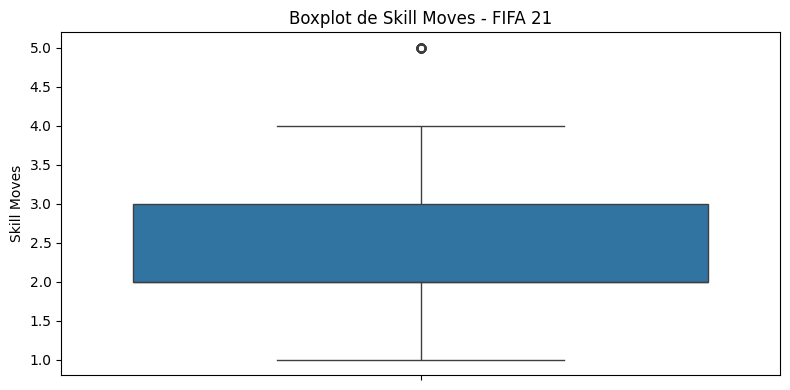

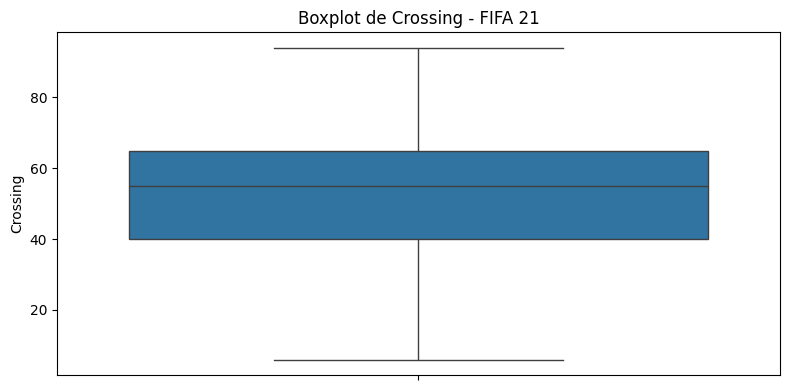

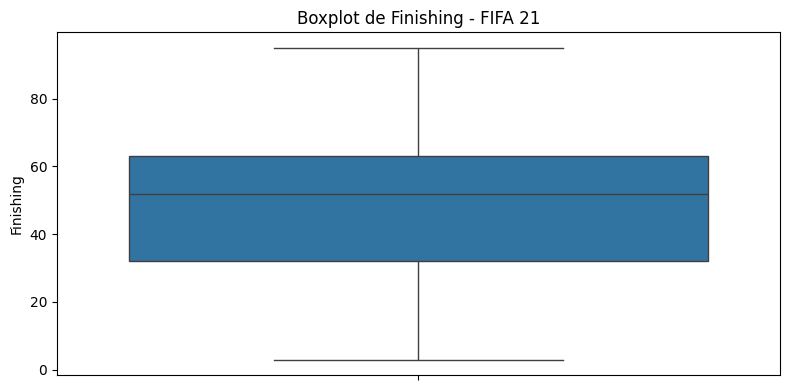

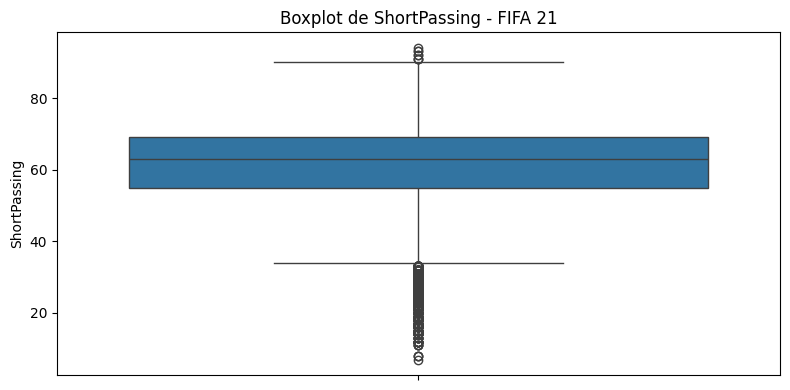

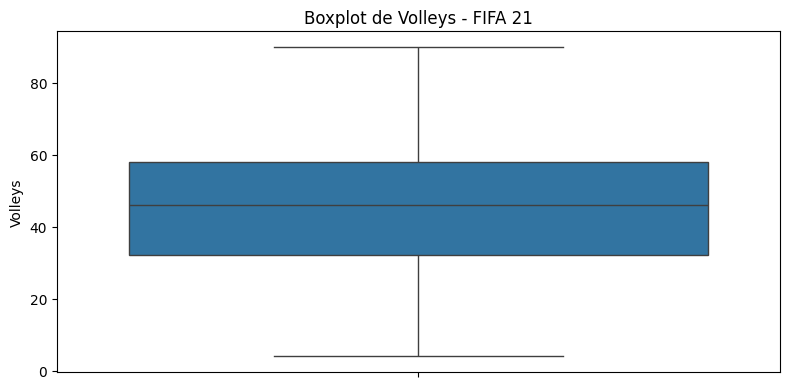

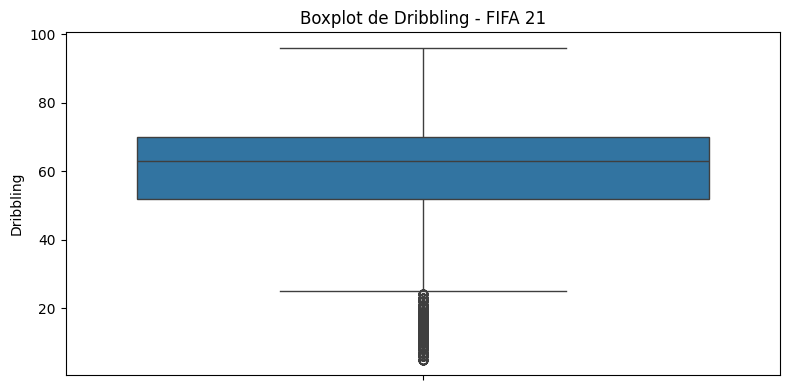

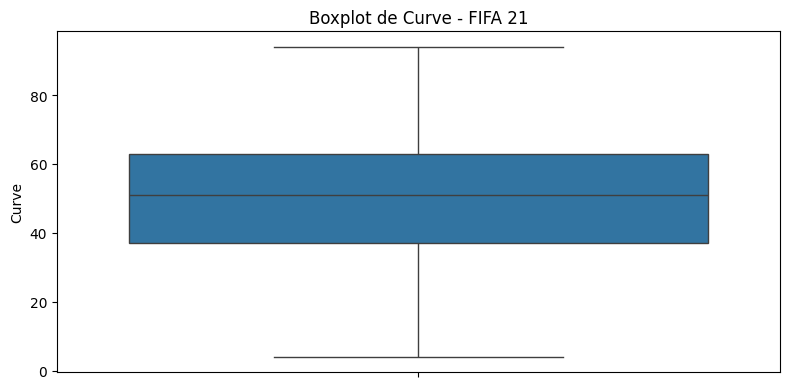

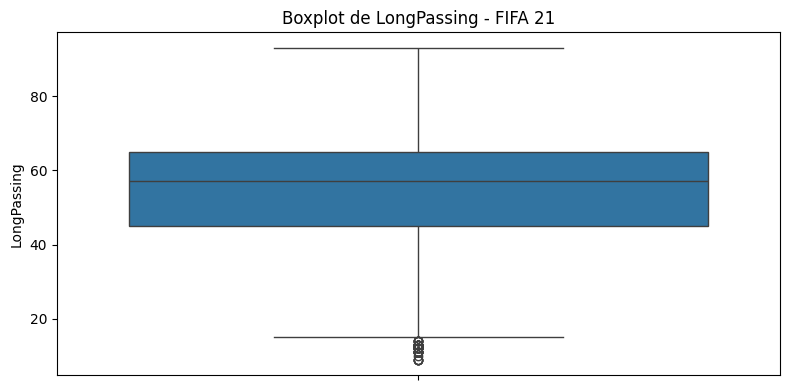

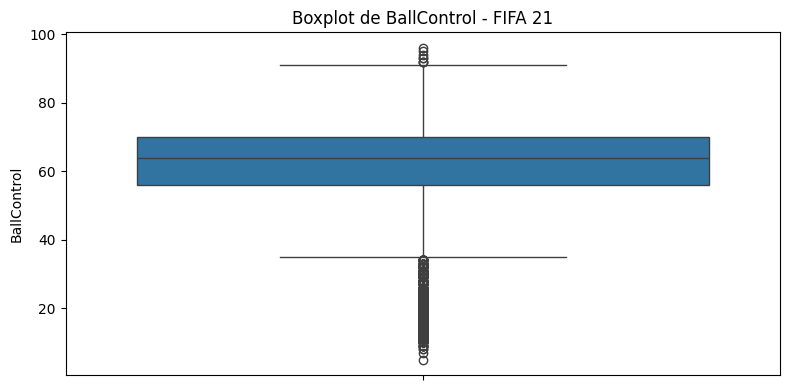

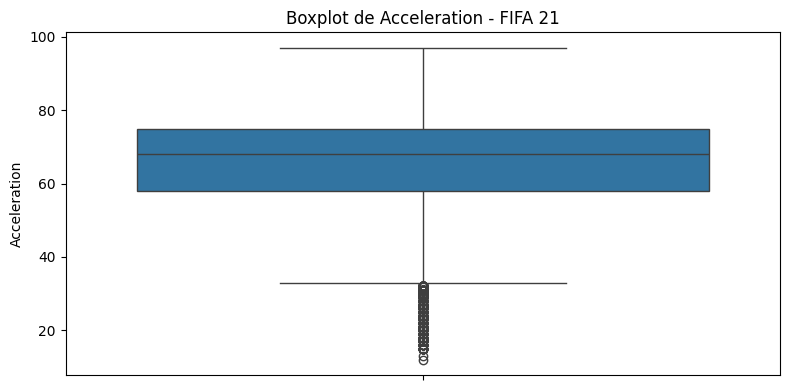

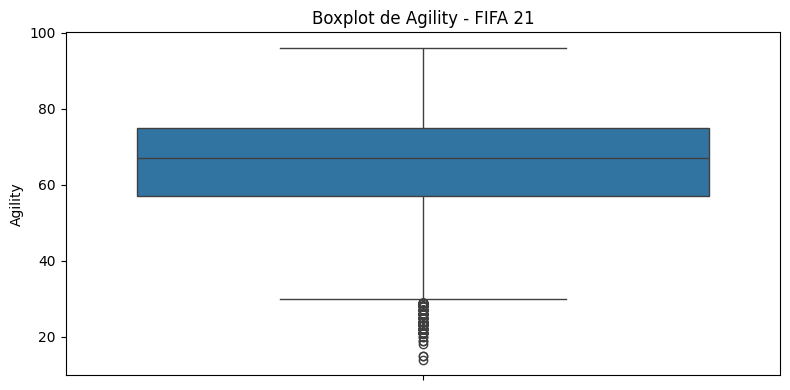

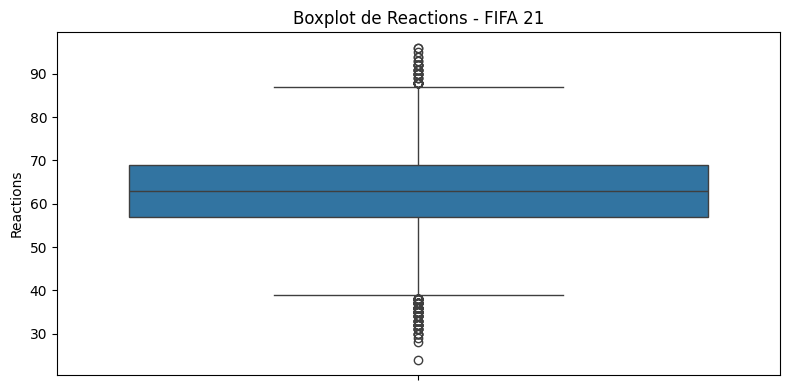

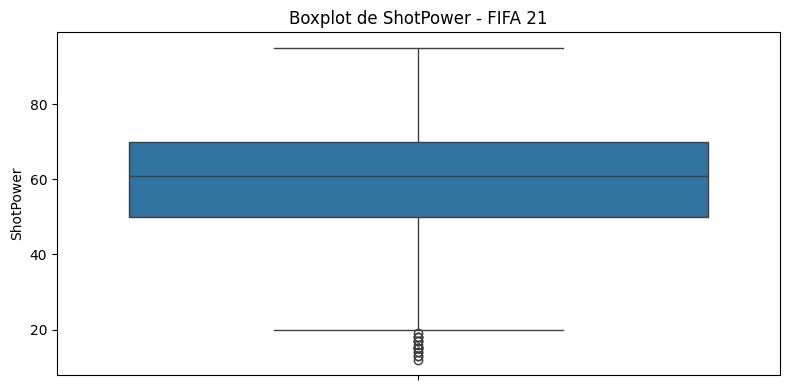

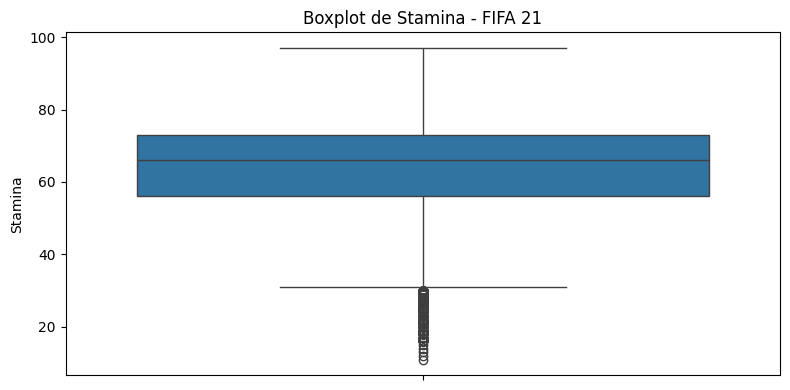

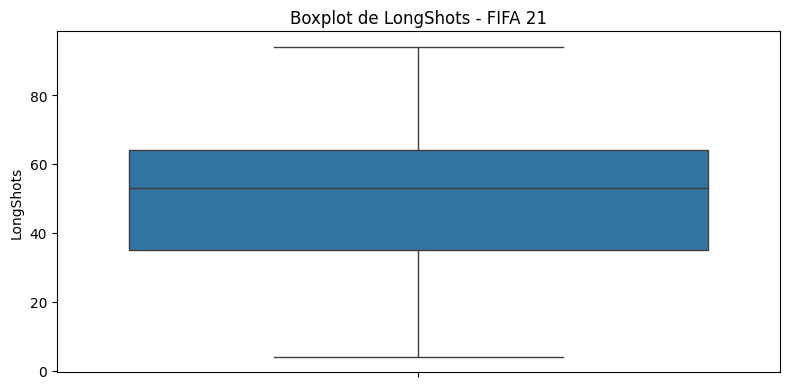

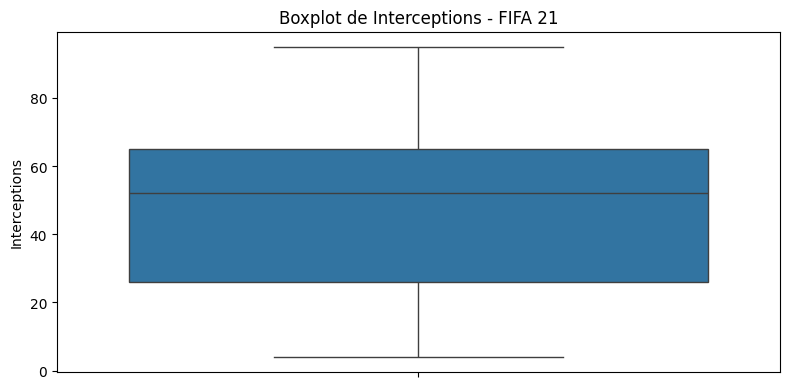

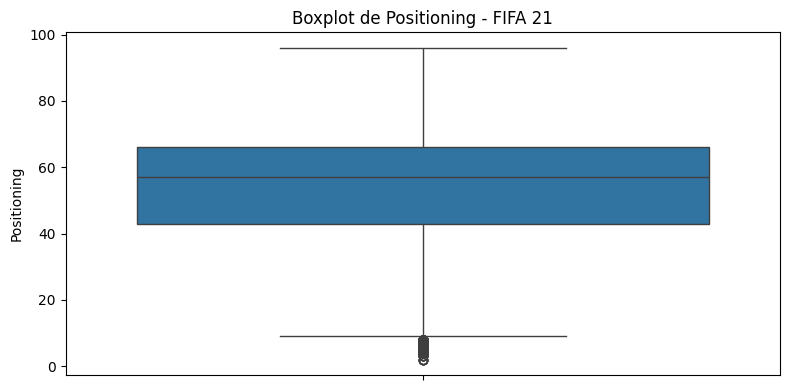

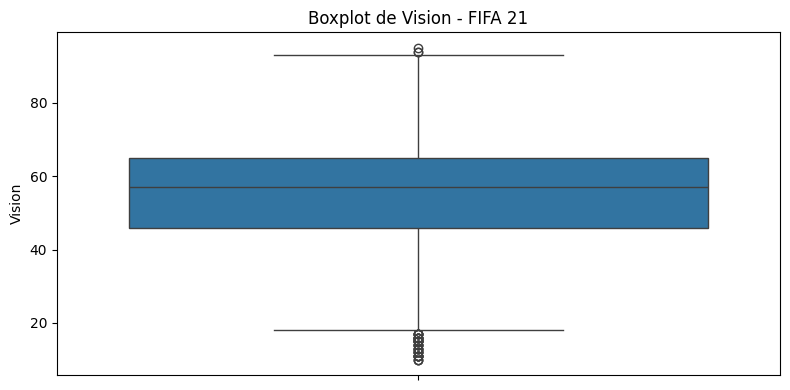

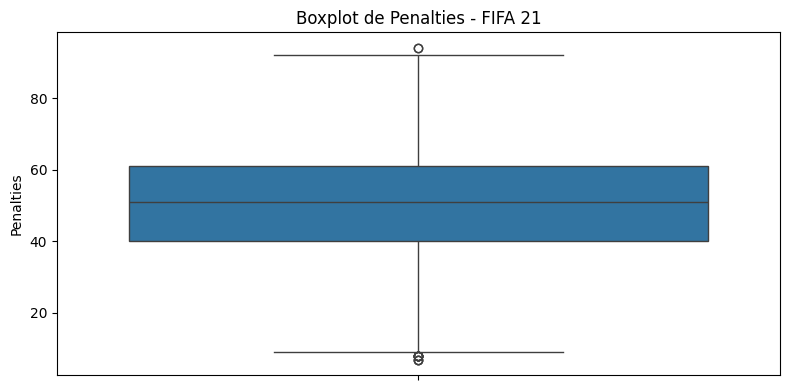

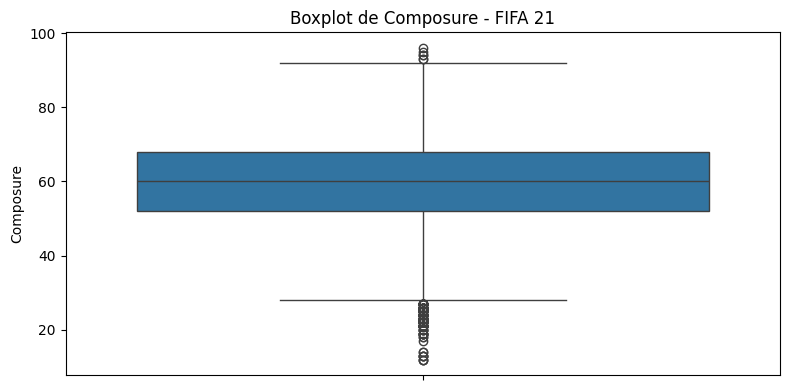

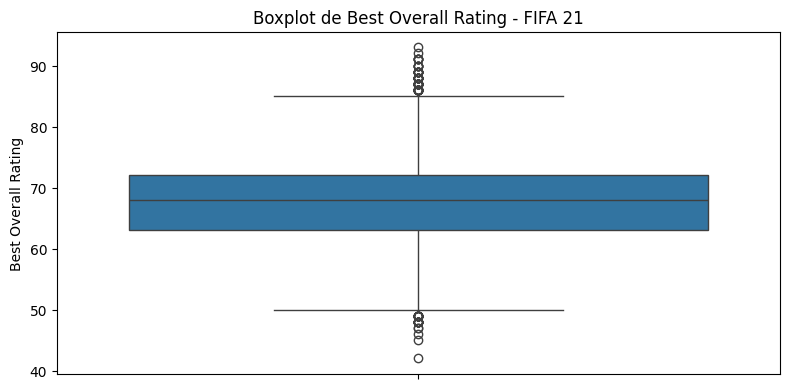

In [122]:
plot_only_boxplots(FIFA21_df, "21")

In [123]:
FIFA21_df.drop(FIFA21_df[FIFA21_df['Age'] >=39 ].index, inplace=True)   
FIFA21_df.drop(FIFA21_df[FIFA21_df['Overall'] <=46 ].index, inplace=True)   
FIFA21_df.drop(FIFA21_df[FIFA21_df['Special'] >=2303 ].index, inplace=True)   
FIFA21_df.drop(FIFA21_df[FIFA21_df['Reactions'] <=24.0 ].index, inplace=True)   
FIFA21_df.drop(FIFA21_df[FIFA21_df['Penalties'] >=94.0 ].index, inplace=True)   
FIFA21_df.drop(FIFA21_df[FIFA21_df['Penalties'] <=8.0 ].index, inplace=True)   

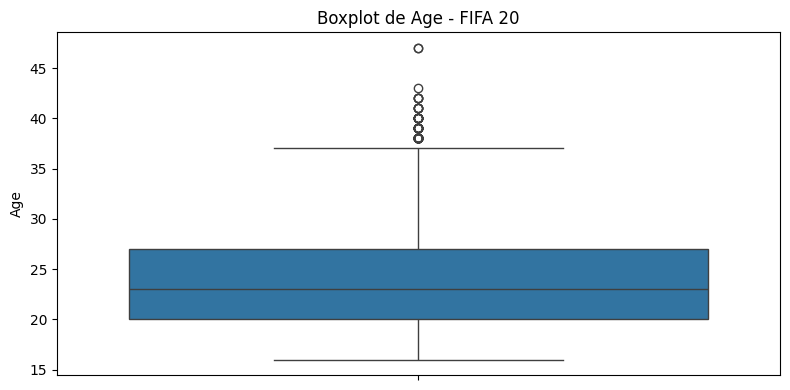

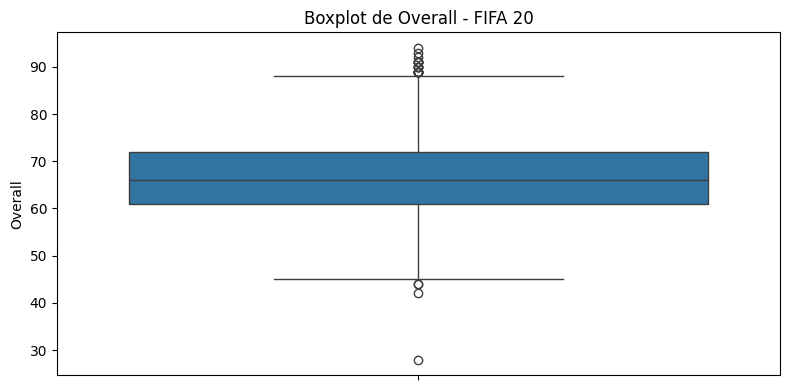

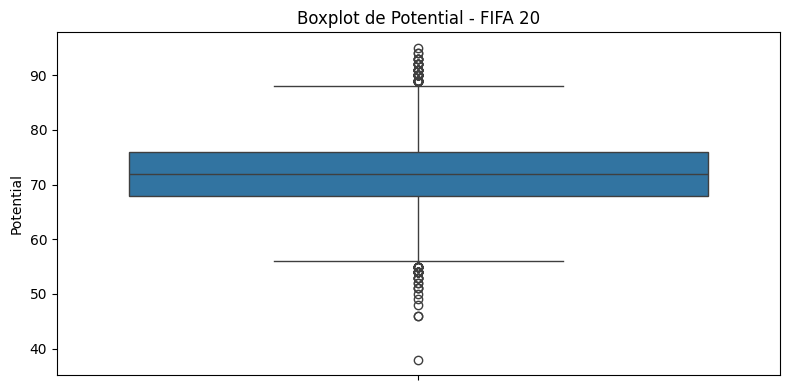

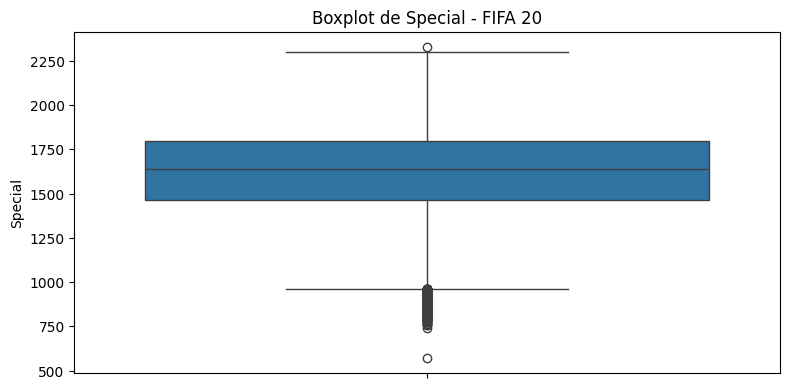

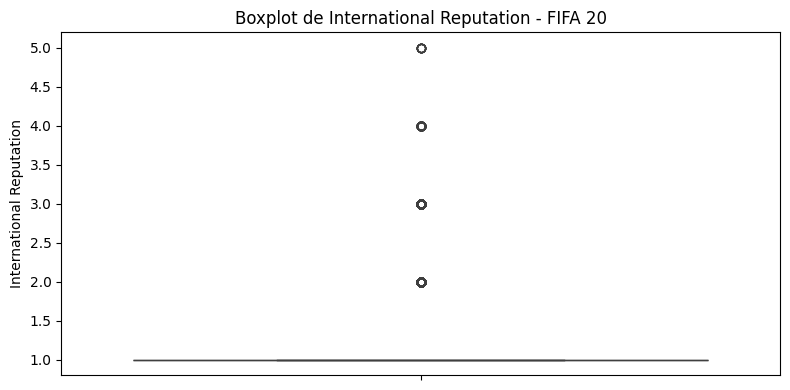

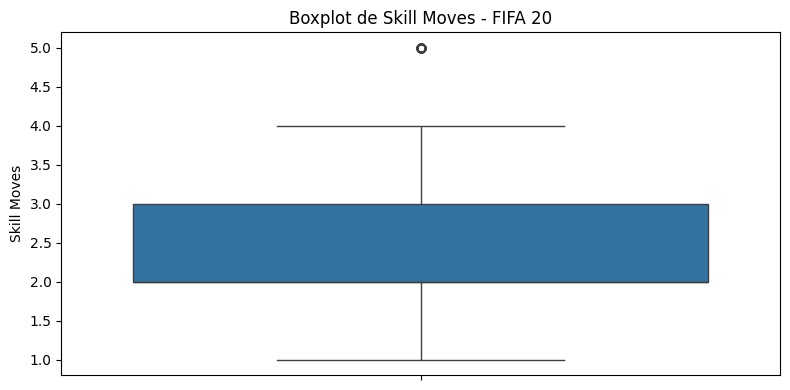

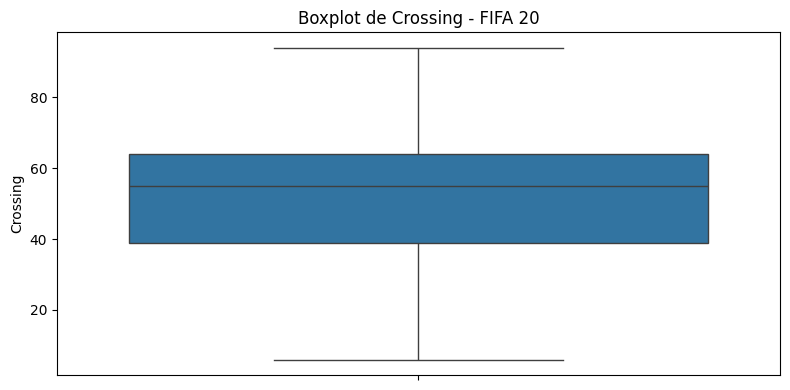

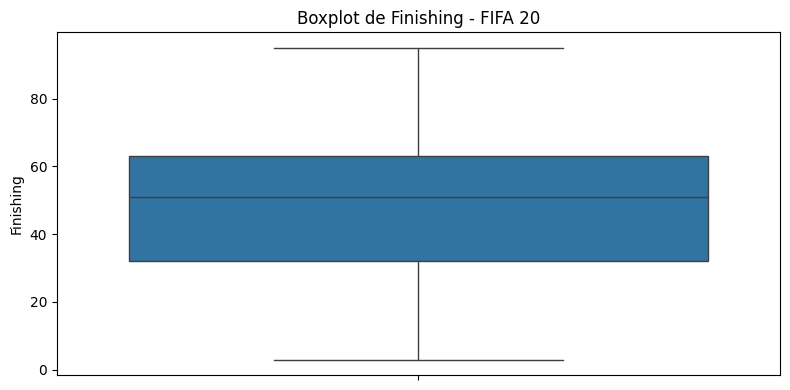

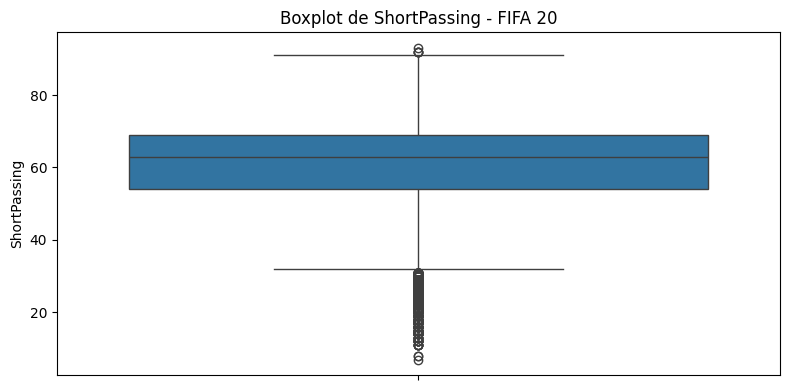

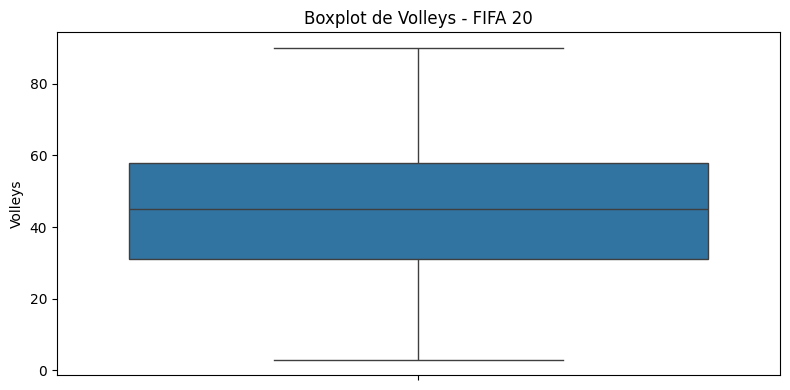

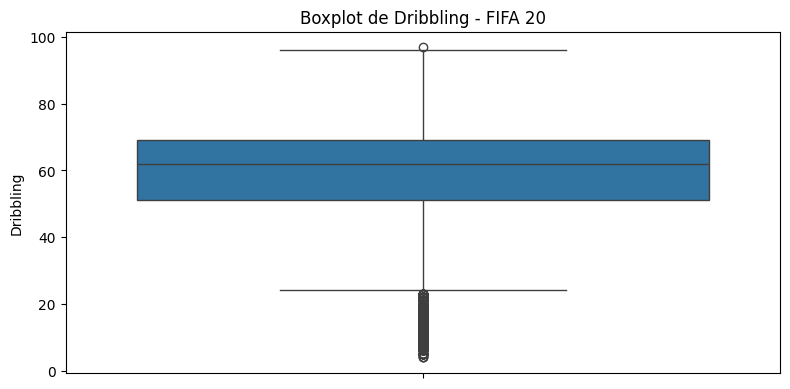

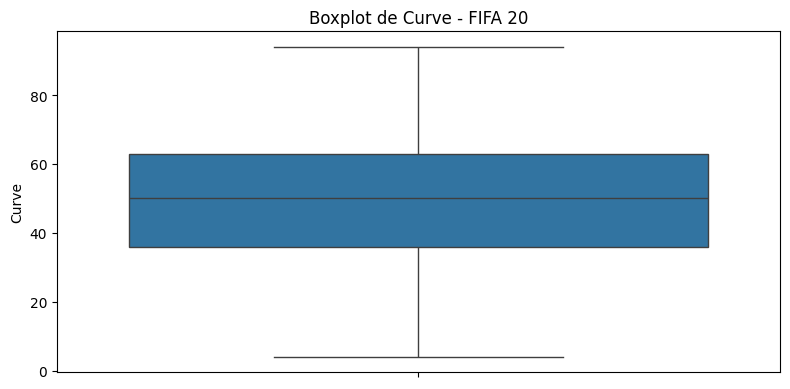

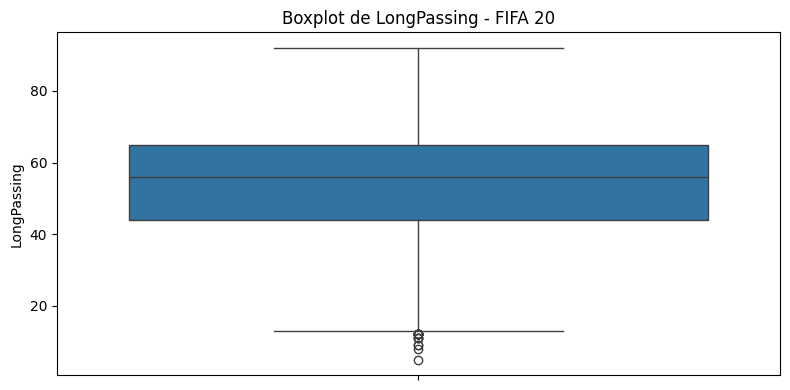

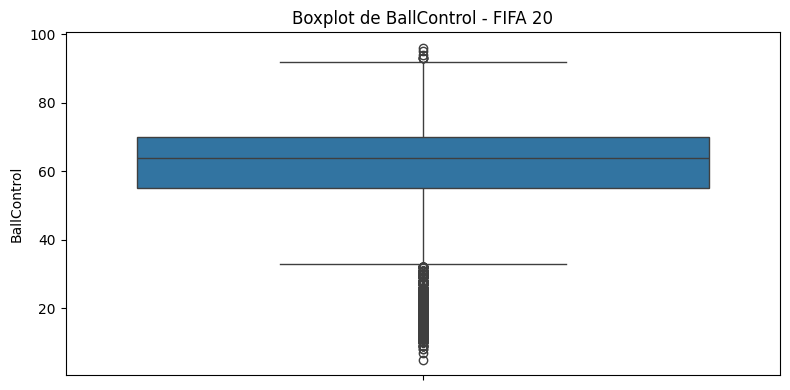

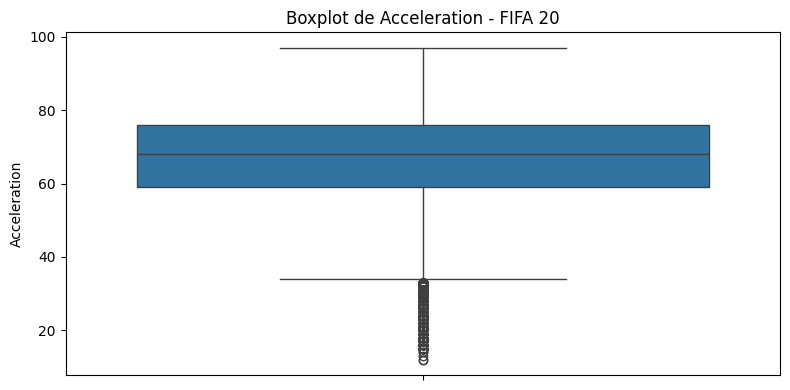

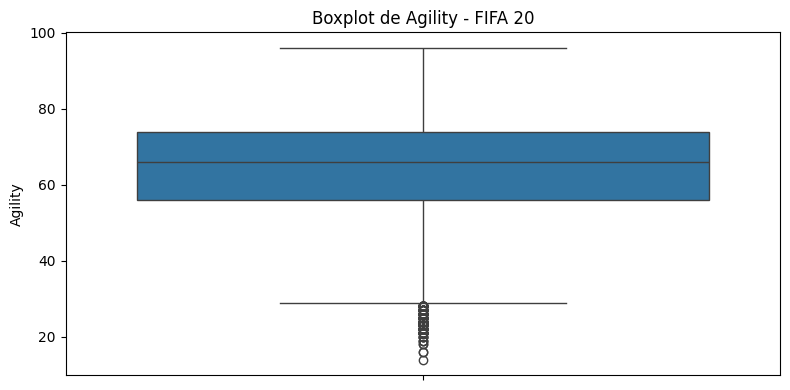

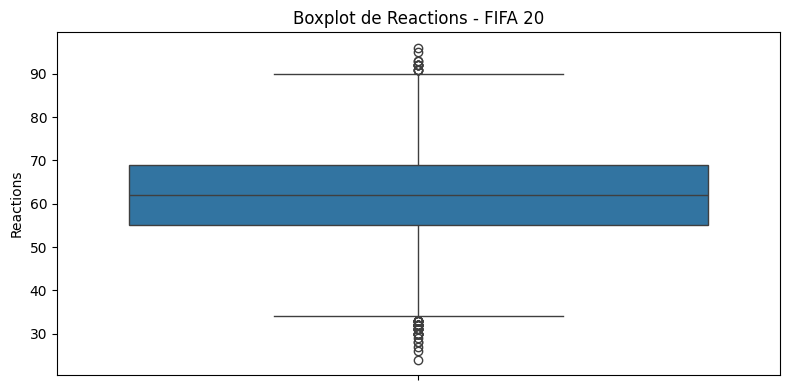

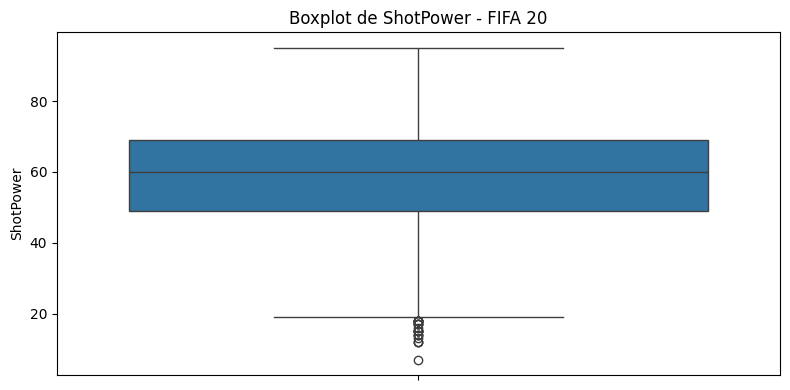

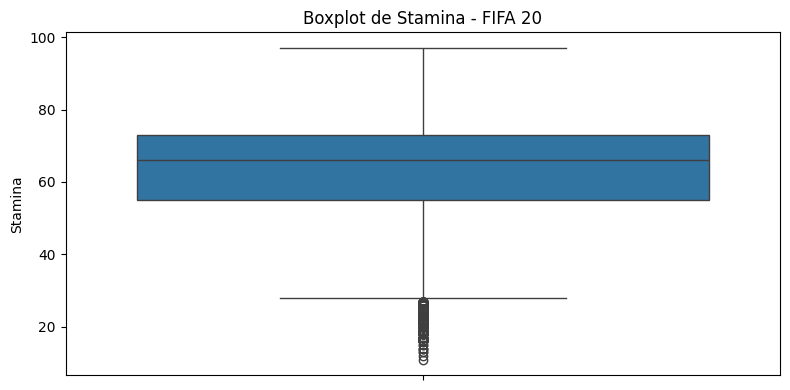

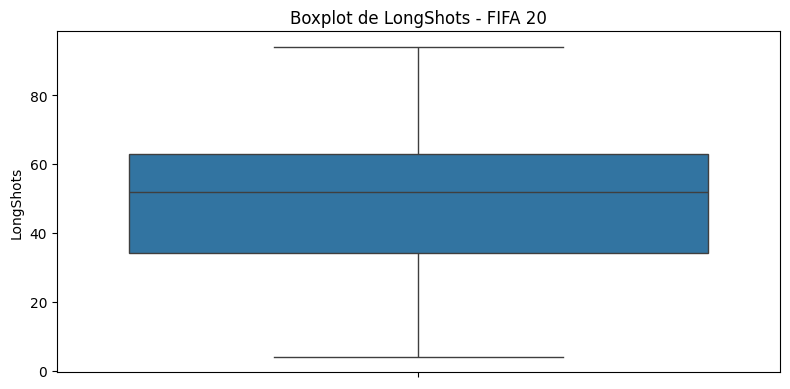

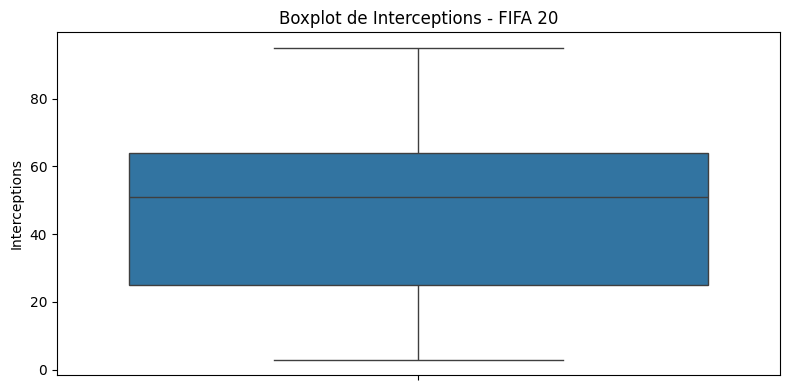

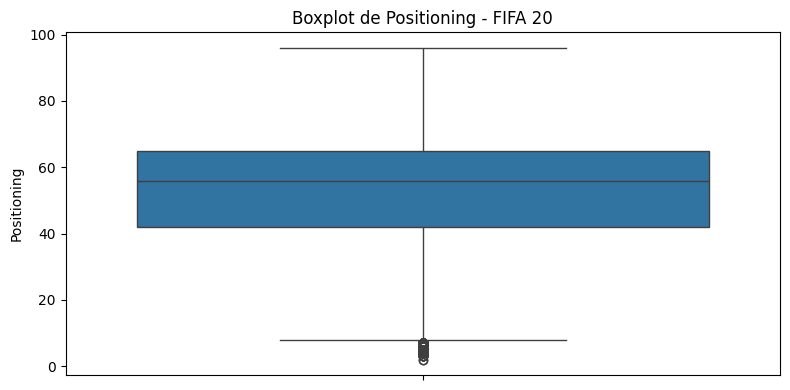

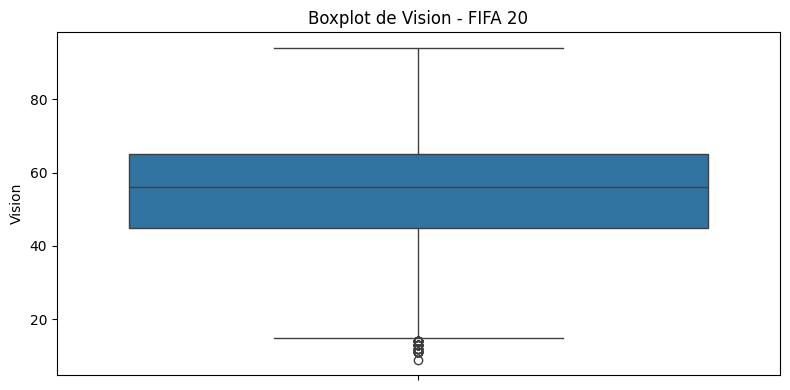

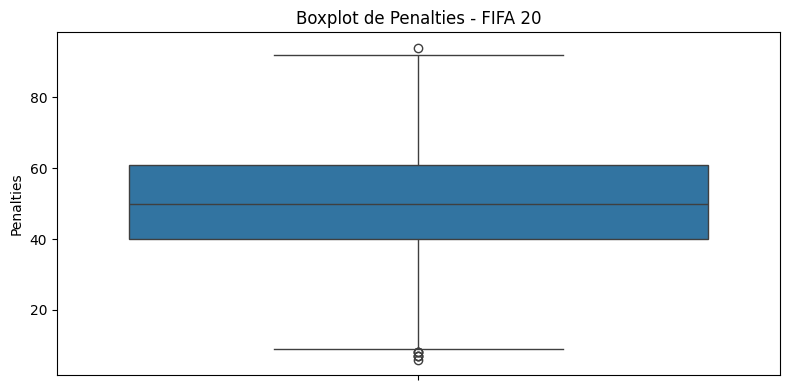

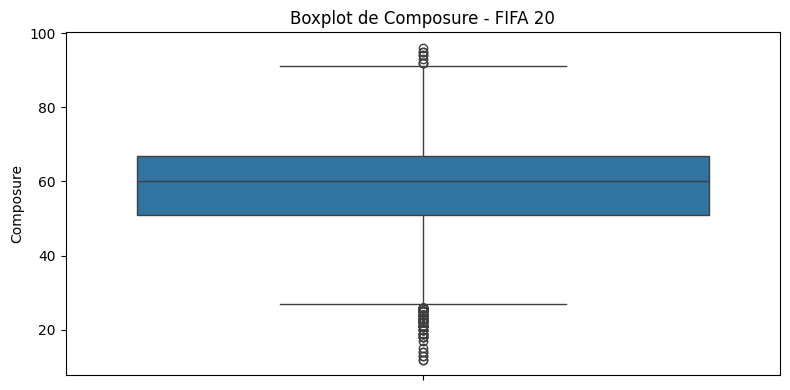

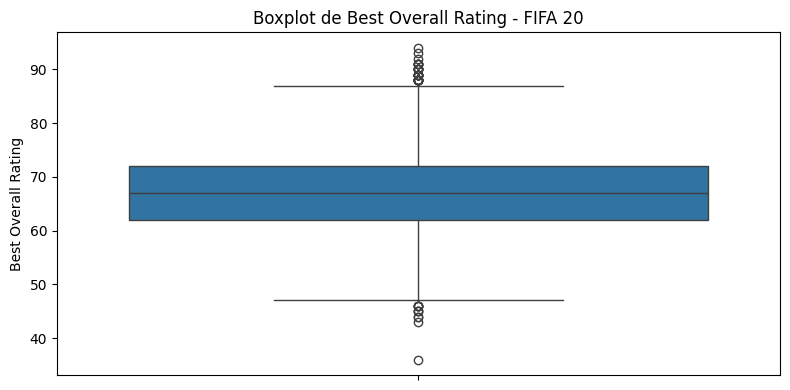

In [124]:
plot_only_boxplots(FIFA20_df, "20")

In [125]:
FIFA20_df.drop(FIFA20_df[FIFA20_df['Age'] >=38 ].index, inplace=True)   
FIFA20_df.drop(FIFA20_df[FIFA20_df['Overall'] <=44 ].index, inplace=True)
FIFA20_df.drop(FIFA20_df[FIFA20_df['Special'] >=2299 ].index, inplace=True)   
FIFA20_df.drop(FIFA20_df[FIFA20_df['ShortPassing'] >=92 ].index, inplace=True)   
FIFA20_df.drop(FIFA20_df[FIFA20_df['Potential'] <=46 ].index, inplace=True)   
FIFA20_df.drop(FIFA20_df[FIFA20_df['LongPassing'] <=13 ].index, inplace=True)  
FIFA20_df.drop(FIFA20_df[FIFA20_df['BallControl'] >=93 ].index, inplace=True)   
FIFA20_df.drop(FIFA20_df[FIFA20_df['ShotPower'] <=19 ].index, inplace=True)   
FIFA20_df.drop(FIFA20_df[FIFA20_df['Penalties'] <=8 ].index, inplace=True)   

### **Feature engineering**

**Promedio de habilidades ofensivas (`Offensive_Skills`):** Con las caracteristicas del jugador ofensivo (ataque) a partir de las caracteristicas de Finishing, Dribbling y ShotPower para  crea una variable llamada Offensive_Skills O Habilidades ofensivas la cual calcula el promedio ofe

**Promedio de habilidades defensivas (`Defensive_Skills`):**

In [126]:
FIFA22_df['Offensive_Skills'] = FIFA22_df[['Finishing', 'Dribbling', 'ShotPower']].mean(axis=1)
FIFA22_df['Defensive_Skills'] = FIFA22_df[['Marking', 'StandingTackle', 'SlidingTackle',
                                           'Interceptions', 'Strength', 'Aggression']].mean(axis=1)

s

In [127]:
##FIFA22
FIFA22_df['Joined'] = pd.to_datetime(FIFA22_df['Joined'], errors='coerce')
FIFA22_df['Joined_Year'] = FIFA22_df['Joined'].dt.year
FIFA22_df['Joined_Month'] = FIFA22_df['Joined'].dt.month
FIFA22_df['Joined_Day'] = FIFA22_df['Joined'].dt.day

##FIFA21
FIFA21_df['Joined'] = pd.to_datetime(FIFA21_df['Joined'], errors='coerce')
FIFA21_df['Joined_Year'] = FIFA21_df['Joined'].dt.year
FIFA21_df['Joined_Month'] = FIFA21_df['Joined'].dt.month
FIFA21_df['Joined_Day'] = FIFA21_df['Joined'].dt.day

##FIFA20
FIFA20_df['Joined'] = pd.to_datetime(FIFA20_df['Joined'], errors='coerce')
FIFA20_df['Joined_Year'] = FIFA20_df['Joined'].dt.year
FIFA20_df['Joined_Month'] = FIFA20_df['Joined'].dt.month
FIFA20_df['Joined_Day'] = FIFA20_df['Joined'].dt.day

# resultado
print("FIFA22 - Joined:")
print(FIFA22_df[['Joined', 'Joined_Year', 'Joined_Month', 'Joined_Day']].head(), "\n")

print("FIFA21 - Joined:")
print(FIFA21_df[['Joined', 'Joined_Year', 'Joined_Month', 'Joined_Day']].head(), "\n")

print("FIFA20 - Joined:")
print(FIFA20_df[['Joined', 'Joined_Year', 'Joined_Month', 'Joined_Day']].head(), "\n")


FIFA22 - Joined:
      Joined  Joined_Year  Joined_Month  Joined_Day
0 2020-01-30       2020.0           1.0        30.0
1 2018-07-01       2018.0           7.0         1.0
2 2020-09-25       2020.0           9.0        25.0
4 2020-09-14       2020.0           9.0        14.0
5 2015-07-01       2015.0           7.0         1.0 

FIFA21 - Joined:
      Joined  Joined_Year  Joined_Month  Joined_Day
3 2019-07-12       2019.0           7.0        12.0
4 2020-09-14       2020.0           9.0        14.0
5 2016-07-13       2016.0           7.0        13.0
6 2019-01-15       2019.0           1.0        15.0
7 2018-07-01       2018.0           7.0         1.0 

FIFA20 - Joined:
      Joined  Joined_Year  Joined_Month  Joined_Day
4        NaT          NaN           NaN         NaN
5 2016-07-13       2016.0           7.0        13.0
6 2019-01-15       2019.0           1.0        15.0
7        NaT          NaN           NaN         NaN
8 2010-02-10       2010.0           2.0        10.0 



#### **Formatear y transformar datos**

#### **Cambio de formato para `Position`**

Debido a un error de extracción en la característica `Position`, donde los valores presentan etiquetas HTML (por ejemplo: `<span class="pos pos18">CAM`), se realizará una modificación para conservar únicamente los últimos dos o tres caracteres, con el fin de obtener correctamente la posición del jugador.

In [128]:
print(FIFA22_df["Position"].head())

0    <span class="pos pos18">CAM
1    <span class="pos pos11">LDM
2     <span class="pos pos24">RS
4      <span class="pos pos7">LB
5     <span class="pos pos9">RDM
Name: Position, dtype: object


In [129]:
# FIFA 22
FIFA22_df["Position"] = FIFA22_df["Position"].str[-3:].str.strip()
FIFA22_df["Position"] = FIFA22_df["Position"].str.replace(">", "", regex=False).str[-3:]
print("FIFA22 positions:", FIFA22_df["Position"].unique())

# FIFA 21
FIFA21_df["Position"] = FIFA21_df["Position"].str[-3:].str.strip()
FIFA21_df["Position"] = FIFA21_df["Position"].str.replace(">", "", regex=False).str[-3:]
print("FIFA21 positions:", FIFA21_df["Position"].unique())

# FIFA 20
FIFA20_df["Position"] = FIFA20_df["Position"].str[-3:].str.strip()
FIFA20_df["Position"] = FIFA20_df["Position"].str.replace(">", "", regex=False).str[-3:]
print("FIFA20 positions:", FIFA20_df["Position"].unique())

FIFA22 positions: ['CAM' 'LDM' 'RS' 'LB' 'RDM' 'LCM' 'SUB' 'LS' 'RM' 'RCM' 'LM' 'RB' 'CDM'
 'LW' 'ST' 'RW' 'RF' 'LWB' 'RAM' 'CF' 'RES' 'LF' 'CM' 'LCB' 'RWB' 'CB'
 'RCB' nan 'LAM' 'GK']
FIFA21 positions: ['RW' 'LB' 'LDM' 'SUB' 'RDM' 'LCM' 'RCB' 'LCB' 'RCM' 'CAM' 'ST' 'RB' 'LS'
 'CDM' 'LW' 'LM' 'CF' 'RES' 'CM' 'RS' 'RM' 'LWB' 'LAM' 'LF' 'RF' 'RWB'
 'CB' nan 'RAM' 'GK']
FIFA20 positions: ['LCM' 'LB' 'LDM' 'RF' 'LCB' 'SUB' 'RCM' 'CDM' 'RW' 'LS' 'CF' 'LM' 'RB'
 'LW' 'RDM' 'CM' 'CAM' 'RES' 'LF' 'ST' 'RAM' 'LWB' 'LAM' 'RM' 'RCB' 'RS'
 'RWB' 'CB' nan 'GK']


#### **Cambio de formato para `Height` y `Weight`**

En la variable `Height`, se eliminarán las unidades de medida (por ejemplo, 179cm pasará a 179). Además, los valores expresados en pies y pulgadas (como 6'0") serán convertidos a centímetros, manteniendo únicamente valores **numéricos**.

En la variable `Weight`, se unificarán las unidades de medida expresadas en libras (lbs) y kilogramos (kg), transformando todos los valores a un formato numérico entero (int64).

In [130]:
FIFA22_df["Height"].unique()


array(['179cm', '189cm', '182cm', '172cm', '177cm', '183cm', '175cm',
       '186cm', '176cm', '184cm', '180cm', '181cm', '178cm', '191cm',
       '185cm', '188cm', '170cm', '168cm', '174cm', '171cm', '173cm',
       '167cm', '187cm', '169cm', '190cm', '192cm', '193cm', '194cm',
       '166cm', '165cm', '163cm', '197cm', '195cm', '160cm', '158cm',
       '161cm', '157cm', '196cm', '162cm', '164cm', '198cm', '201cm',
       '200cm', '159cm', '156cm', '199cm', '155cm', '202cm', '203cm',
       '206cm'], dtype=object)

In [131]:
def _formato_height(x: pd.Series) -> pd.Series:
    def convertir_altura(valor):
        if isinstance(valor, str):
            if "cm" in valor:
                # Caso: viene en centímetros
                return int(valor.replace("cm", "").strip())
            elif "'" in valor:
                # Caso: viene en pies y pulgadas -> ej. "5'11"
                partes = valor.replace('"', "").split("'")
                pies = int(partes[0])
                pulgadas = int(partes[1]) if partes[1] else 0
                return round((pies * 30.48) + (pulgadas * 2.54))
        return None  # si no cumple formato o es NaN
    
    return x.apply(convertir_altura)

_formato_height(FIFA22_df["Height"])   
_formato_height(FIFA21_df["Height"])    
_formato_height(FIFA20_df["Height"])    


4        173
5        180
6        183
7        175
8        180
        ... 
17096    185
17098    190
17100    183
17101    190
17102    185
Name: Height, Length: 16930, dtype: int64

In [132]:
print("PESOS FIFA 20:")
print(FIFA20_df["Weight"].unique())

print("\nPESOS FIFA 21:")
print(FIFA21_df["Weight"].unique())

print("\nPESOS FIFA 22:")
print(FIFA22_df["Weight"].unique())


PESOS FIFA 20:
['152lbs' '157lbs' '176lbs' '143lbs' '172lbs' '165lbs' '146lbs' '179lbs'
 '148lbs' '161lbs' '185lbs' '150lbs' '181lbs' '183lbs' '168lbs' '174lbs'
 '163lbs' '170lbs' '154lbs' '137lbs' '159lbs' '194lbs' '134lbs' '187lbs'
 '196lbs' '190lbs' '132lbs' '198lbs' '141lbs' '201lbs' '192lbs' '203lbs'
 '139lbs' '128lbs' '207lbs' '209lbs' '212lbs' '130lbs' '205lbs' '220lbs'
 '123lbs' '121lbs' '115lbs' '223lbs' '126lbs' '216lbs' '214lbs' '117lbs'
 '119lbs' '218lbs' '243lbs' '110lbs' '225lbs' '227lbs']

PESOS FIFA 21:
['161lbs' '152lbs' '157lbs' '176lbs' '143lbs' '190lbs' '181lbs' '168lbs'
 '146lbs' '172lbs' '165lbs' '179lbs' '185lbs' '159lbs' '148lbs' '150lbs'
 '183lbs' '163lbs' '154lbs' '170lbs' '174lbs' '137lbs' '194lbs' '134lbs'
 '187lbs' '196lbs' '132lbs' '141lbs' '201lbs' '192lbs' '203lbs' '139lbs'
 '198lbs' '207lbs' '128lbs' '130lbs' '209lbs' '212lbs' '220lbs' '123lbs'
 '205lbs' '126lbs' '121lbs' '214lbs' '216lbs' '119lbs' '117lbs' '229lbs'
 '243lbs' '223lbs' '110lbs' '218lbs' 

In [133]:
def formato_weight(x: pd.Series) -> pd.Series:
    # Si tiene 'lbs', convertir a kg
    if x.str.contains('lbs').any():
        x = x.str.replace('lbs', '', regex=False).astype(float) * 0.453592
    # Si tiene 'kg', eliminar el texto y dejar como float
    elif x.str.contains('kg').any():
        x = x.str.replace('kg', '', regex=False).astype(float)
    return x

In [134]:
formato_weight(FIFA22_df["Weight"])
formato_weight(FIFA21_df["Weight"])
formato_weight(FIFA20_df["Weight"])


4        68.945984
5        71.213944
6        79.832192
7        64.863656
8        78.017824
           ...    
17096    64.863656
17098    81.192968
17100    79.832192
17101    78.925008
17102    76.203456
Name: Weight, Length: 16930, dtype: float64

#### Cambio del formato para `Value`, `Wage` y `Release Clause`

In [135]:
def money_to_number(s):
    """Convert '€110.5M','€500K','€1.2B' or numeric-like strings into float (euros)."""
    if pd.isna(s): return np.nan
    if isinstance(s, (int, float)): return float(s)
    s = str(s).strip().replace('€','').replace('£','').replace(' ','')
    if s == '': return np.nan
    try:
        if s.endswith('M'): return float(s[:-1]) * 1e6
        if s.endswith('K'): return float(s[:-1]) * 1e3
        if s.endswith('B'): return float(s[:-1]) * 1e9
        # remove non-numeric chars
        return float(re.sub(r'[^\d.]','', s))
    except:
        return np.nan

# monetary columns: 'Value', 'Wage', 'Release Clause' (from df.info)
for col in ['Value', 'Wage', 'Release Clause']:
    if col in FIFA22_df.columns:
        newc = col + '_num'
        FIFA22_df[newc] = FIFA22_df[col].apply(money_to_number)
        print(f"Created {newc} from {col} - non-null:", FIFA22_df[newc].notna().sum())

for col in ['Value', 'Wage', 'Release Clause']:
    if col in FIFA21_df.columns:
        newc = col + '_num'
        FIFA21_df[newc] = FIFA21_df[col].apply(money_to_number)
        print(f"Created {newc} from {col} - non-null:", FIFA21_df[newc].notna().sum())

for col in ['Value', 'Wage', 'Release Clause']:
    if col in FIFA20_df.columns:
        newc = col + '_num'
        FIFA20_df[newc] = FIFA20_df[col].apply(money_to_number)
        print(f"Created {newc} from {col} - non-null:", FIFA20_df[newc].notna().sum())

Created Value_num from Value - non-null: 16272
Created Wage_num from Wage - non-null: 14209
Created Release Clause_num from Release Clause - non-null: 14879
Created Value_num from Value - non-null: 16634
Created Wage_num from Wage - non-null: 13747
Created Release Clause_num from Release Clause - non-null: 15420
Created Value_num from Value - non-null: 16511
Created Wage_num from Wage - non-null: 13187
Created Release Clause_num from Release Clause - non-null: 14665


In [136]:
# FIFA 22
value_f22 = FIFA22_df['Value_num'].head(3)
wage_f22 = FIFA22_df['Wage_num'].head(3)
release_f22 = FIFA22_df['Release Clause_num'].head(3)

print("FIFA 22 - Value:\n", value_f22)
print("FIFA 22 - Wage:\n", wage_f22)
print("FIFA 22 - Release Clause:\n", release_f22)

# FIFA 21
value_f21 = FIFA21_df['Value_num'].head(3)
wage_f21 = FIFA21_df['Wage_num'].head(3)
release_f21 = FIFA21_df['Release Clause_num'].head(3)

print("\nFIFA 21 - Value:\n", value_f21)
print("FIFA 21 - Wage:\n", wage_f21)
print("FIFA 21 - Release Clause:\n", release_f21)

# FIFA 20
value_f20 = FIFA20_df['Value_num'].head(3)
wage_f20 = FIFA20_df['Wage_num'].head(3)
release_f20 = FIFA20_df['Release Clause_num'].head(3)

print("\nFIFA 20 - Value:\n", value_f20)
print("FIFA 20 - Wage:\n", wage_f20)
print("FIFA 20 - Release Clause:\n", release_f20)

FIFA 22 - Value:
 0    107500000.0
1     93000000.0
2     44500000.0
Name: Value_num, dtype: float64
FIFA 22 - Wage:
 0    250000.0
1    140000.0
2    135000.0
Name: Wage_num, dtype: float64
FIFA 22 - Release Clause:
 0    206900000.0
1    160400000.0
2     91200000.0
Name: Release Clause_num, dtype: float64

FIFA 21 - Value:
 3    50500000.0
4    22000000.0
5    31000000.0
Name: Value_num, dtype: float64
FIFA 21 - Wage:
 3    290000.0
4     41000.0
5     23000.0
Name: Wage_num, dtype: float64
FIFA 21 - Release Clause:
 3    103500000.0
4     46200000.0
5     64300000.0
Name: Release Clause_num, dtype: float64

FIFA 20 - Value:
 4    20000000.0
5    31500000.0
6    35500000.0
Name: Value_num, dtype: float64
FIFA 20 - Wage:
 4    19000.0
5    23000.0
6    47000.0
Name: Wage_num, dtype: float64
FIFA 20 - Release Clause:
 4    40000000.0
5    65400000.0
6    56800000.0
Name: Release Clause_num, dtype: float64


Luego de realizar el cambio de formato a numerico para nuestra variable objetivo, realizamos una comparativa principal creando un histograma. Debido a que los valores de mercado estimado del jugador expresado en euros (€) contienen grante cantidades de digitos, se le aplicara la tecnica logaritmica para transformar y escalar los datos, obteniendo un buen resultado desde el histograma 1 y el histograma 2 aplicando log1. Como resultado final, se obtiene una distribucion casi normal en la que mejora la correlacion de pearson entre otras caracteristicas y teniendo una escala menor de los datos en Values.

**¿Porque busco usar log1p?**

- Se busca transformar value que contiene valores muy grandes.

**Implementación**

Si el uso de log1p es adecuado y es aprobado por el profesor, se aplicara durante la etapa 4 de Models, no se aplicara una transformación durante el procesamiento de los datos. De lo contrario, se buscara la maenra de reducir los valores de Values.

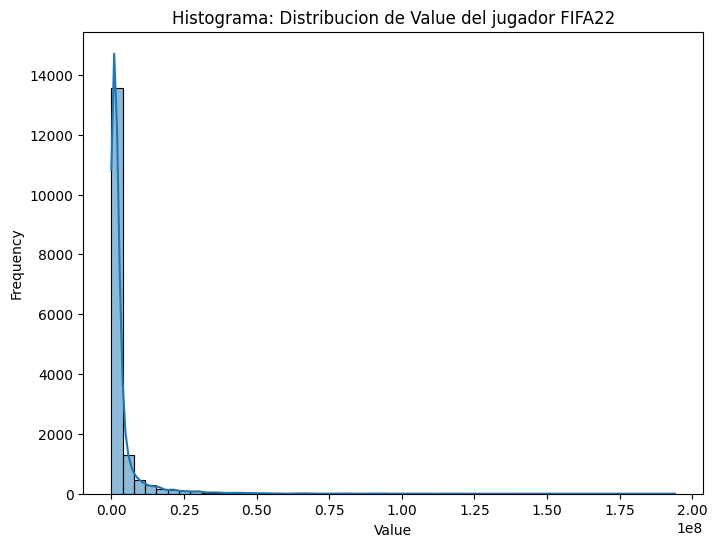

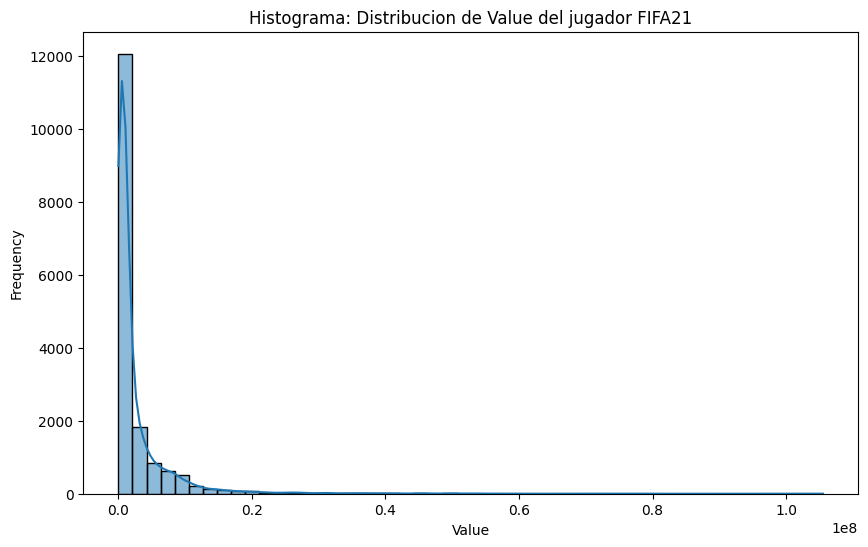

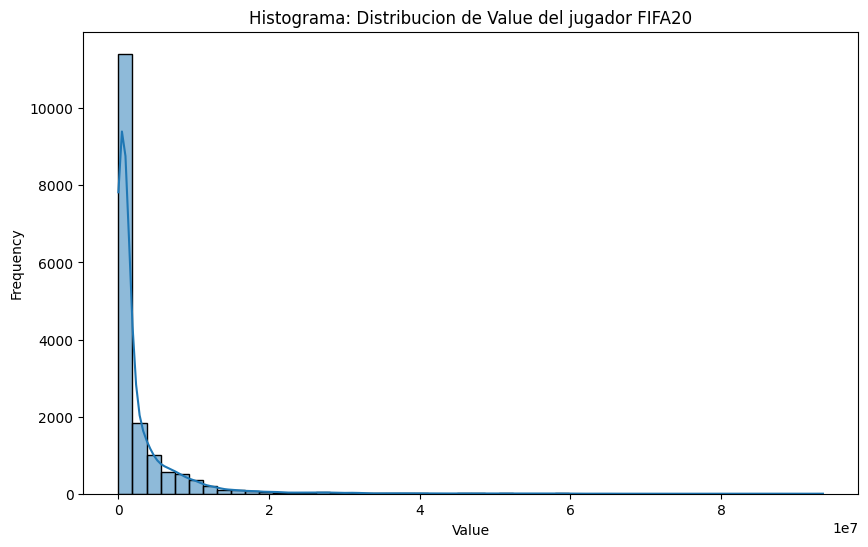

In [137]:
# FIFA22_df
plt.figure(figsize=(8, 6))
sns.histplot(FIFA22_df['Value_num'], bins=50, kde=True)
plt.title('Histograma: Distribucion de Value del jugador FIFA22')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

#FIFA21_df
plt.figure(figsize=(10, 6))
sns.histplot(FIFA21_df['Value_num'], bins=50, kde=True)
plt.title('Histograma: Distribucion de Value del jugador FIFA21')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

#FIFA20_df
plt.figure(figsize=(10, 6))
sns.histplot(FIFA20_df['Value_num'], bins=50, kde=True)
plt.title('Histograma: Distribucion de Value del jugador FIFA20')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [149]:
FIFA22_df['Value_num'] = np.log1p(FIFA22_df['Value_num'])  # log(1 + x)
FIFA21_df['Value_num'] = np.log1p(FIFA21_df['Value_num'])  #ojo, capaz la implementacion log no va en esta etapa sino en models.
FIFA20_df['Value_num'] = np.log1p(FIFA20_df['Value_num'])  

In [150]:
FIFA22_df['Value_num']


0        18.493001
1        18.348110
2        17.611000
4        17.426428
5        18.497642
           ...    
16703    12.043560
16705    11.512935
16706    12.100718
16707    11.512935
16708    11.608245
Name: Value_num, Length: 16585, dtype: float64

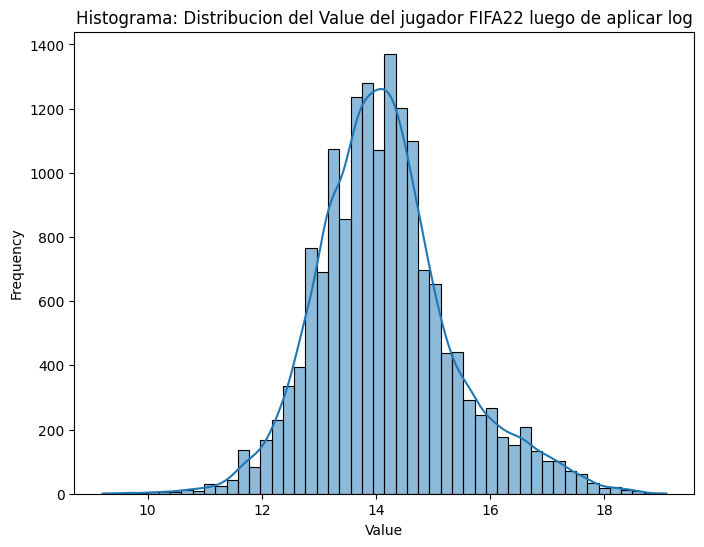

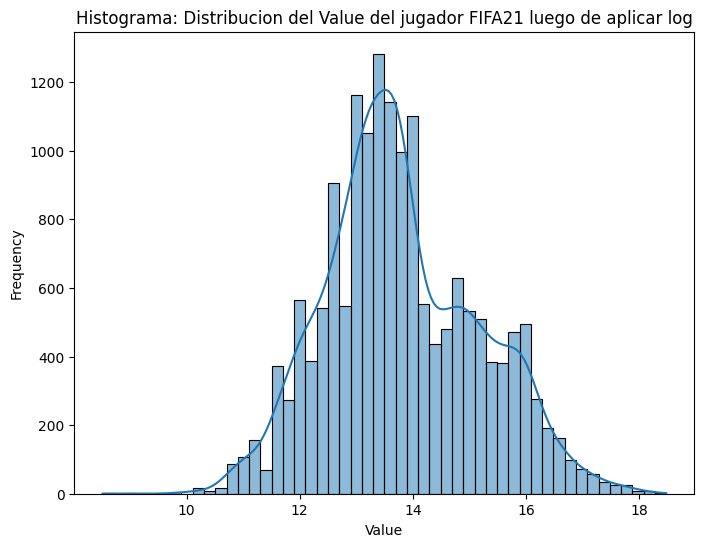

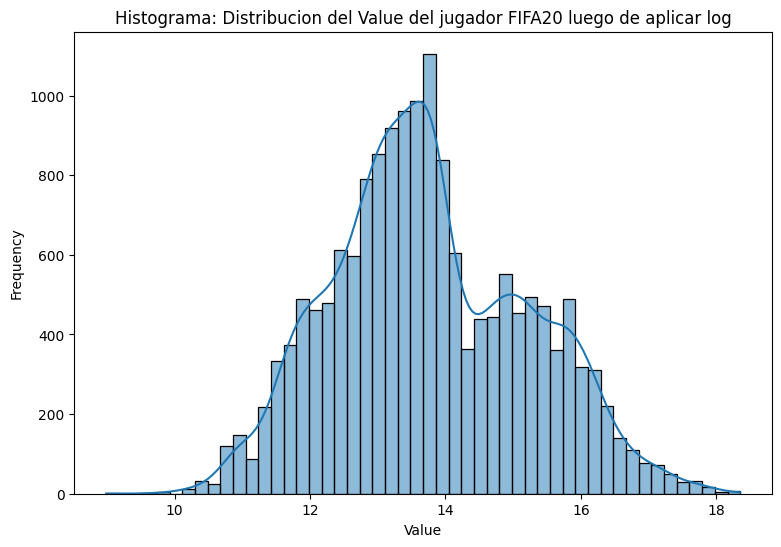

In [151]:
# FIFA22_df
plt.figure(figsize=(8, 6))
sns.histplot(FIFA22_df['Value_num'], bins=50, kde=True)
plt.title('Histograma: Distribucion del Value del jugador FIFA22 luego de aplicar log')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

#FIFA21_df
plt.figure(figsize=(8, 6))
sns.histplot(FIFA21_df['Value_num'], bins=50, kde=True)
plt.title('Histograma: Distribucion del Value del jugador FIFA21 luego de aplicar log')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

#FIFA20_df
plt.figure(figsize=(9, 6))
sns.histplot(FIFA20_df['Value_num'], bins=50, kde=True)
plt.title('Histograma: Distribucion del Value del jugador FIFA20 luego de aplicar log')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


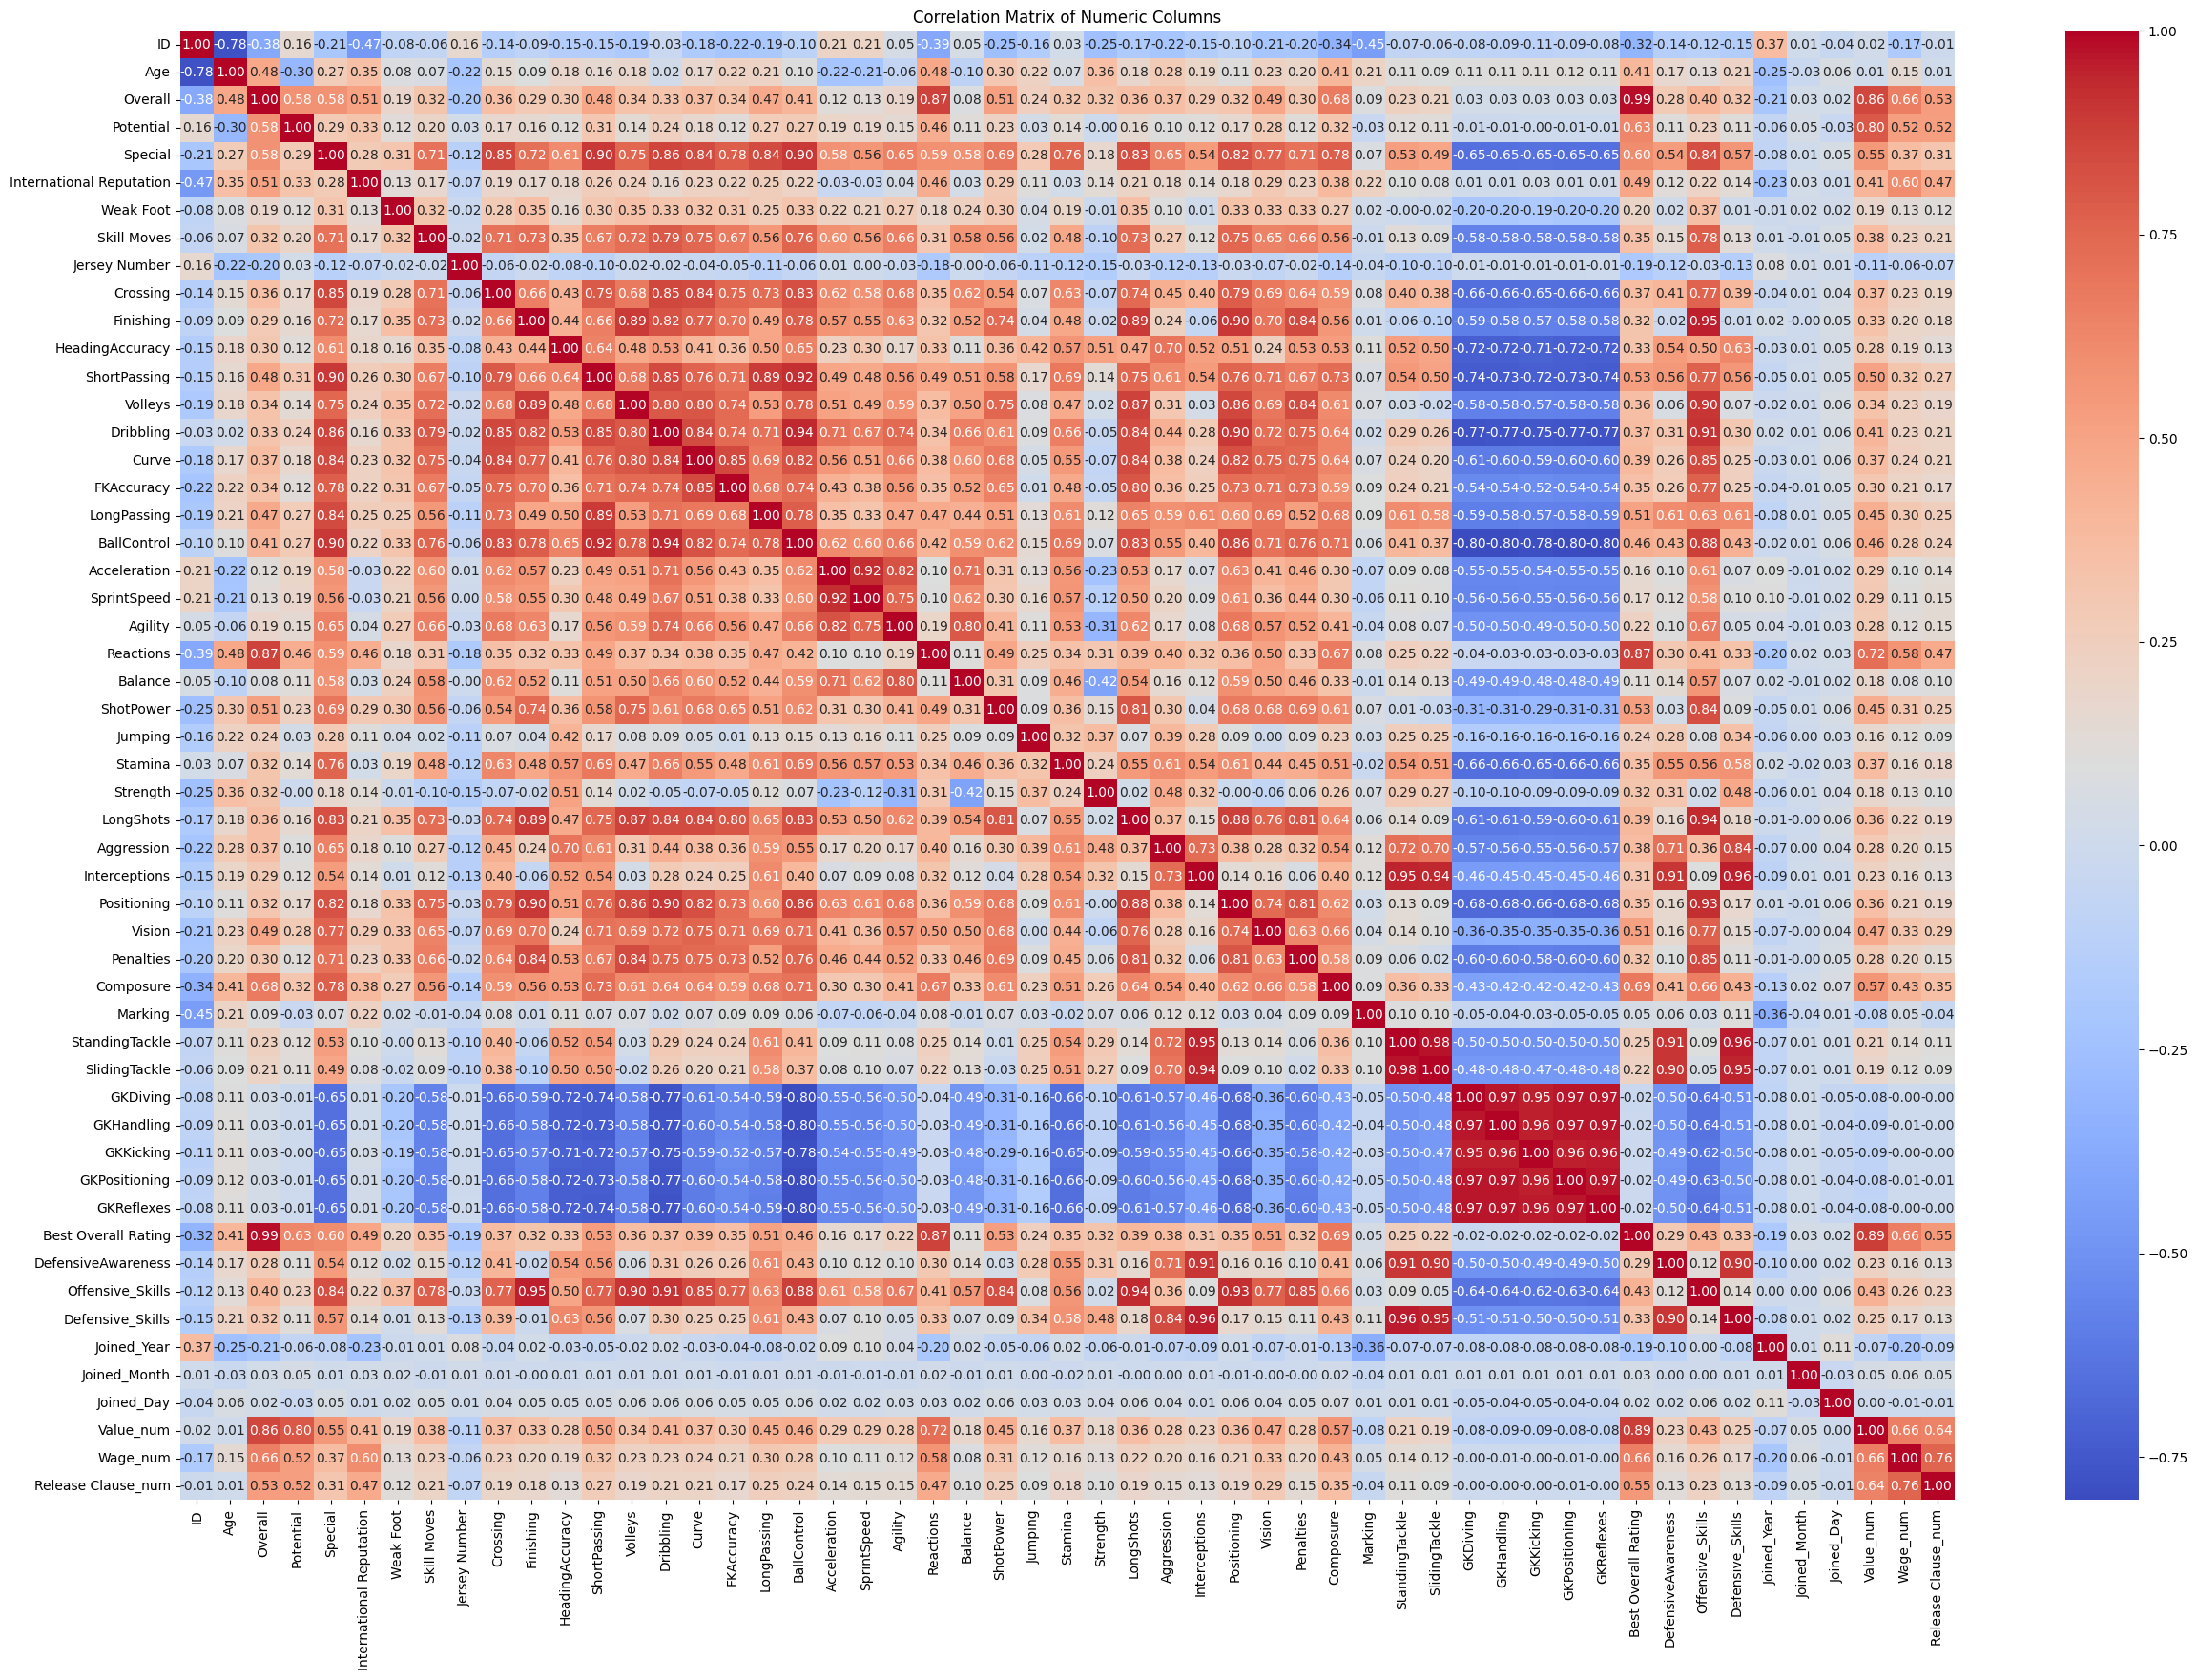

In [152]:
numeric_df = FIFA22_df.select_dtypes(include=np.number)

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

### **luego de la tranformacion, se realiza imputacion**

Imputación
Imputación para Marking

La característica Marking representa la capacidad defensiva de un jugador para marcar o contener al oponente. Dado que esta habilidad solo es relevante para jugadores con posiciones defensivas, los valores nulos se imputarán con cero, lo que refleja adecuadamente la ausencia de esta capacidad en futbolistas de otras posiciones.


In [142]:
FIFA22_df['Marking'].fillna(0, inplace=True)

[10/21/25 23:54:03] WARNING  C:\Users\brand\AppData\Local\Temp\ipykernel_37144\2585515060.py:1:     warnings.py:110
                             FutureWarning: A value is trying to be set on a copy of a DataFrame or                
                             Series through chained assignment using an inplace method.                            
                             The behavior will change in pandas 3.0. This inplace method will never                
                             work because the intermediate object on which we are setting values                   
                             always behaves as a copy.                                                             
                                                                                                                   
                             For example, when doing 'df.method(value, inplace=True)', try using                   
                             'df.method({col: value}, inplace=True)' or df = df.method(value)                      
                             instead, to perform the operation inplace on the original object.                     
                                                                                                                   
                                                                                                                   
                               FIFA22_df['Marking'].fillna(0, inplace=True)                                        
                                                                                                                   

In [ ]:
FIFA22_df.isnull().sum()

In [153]:


olumnas_con_nulos = FIFA22_df.isnull().sum()
columnas_con_nulos = columnas_con_nulos[columnas_con_nulos > 0]

print(columnas_con_nulos)
print("Columnas con datos nulos: ", len(columnas_con_nulos))


# Lista de columnas numéricas que quieras imputar con 0 o mediana
num_cols = ['Marking', 'Volleys', 'Curve', 'Agility', 'Balance', 'Jumping', 
            'Interceptions', 'Positioning', 'Vision', 'Composure', 'SlidingTackle', 
            'DefensiveAwareness', 'Release Clause_num']

# Imputación con mediana para evitar sesgo
for col in num_cols:
    median = FIFA22_df[col].median()
    FIFA22_df[col] = FIFA22_df[col].fillna(median)

Club                      264
Body Type                  29
Real Face                  29
Position                   26
Jersey Number              26
Joined                   1512
Loaned From             15578
Contract Valid Until      351
Release Clause           1749
Joined_Year              1512
Joined_Month             1512
Joined_Day               1512
dtype: int64
Columnas con datos nulos:  12


Imputacion con modas para caracteristicas categoricas

Para la imputacion de variables categoricas se utilizara la funcion moda en la cual busca imputar por los valores que mas se repiten entre los datos de tipo caracter

In [161]:
# Columnas categóricas con valores nulos
cat_cols = ['Club', 'Body Type', 'Position', 'Jersey Number', 'Contract Valid Until']

# Imputación con la moda o "Unknown" si no hay valores
for col in cat_cols:
    if FIFA22_df[col].mode().empty:
        FIFA22_df[col] = FIFA22_df[col].fillna("Unknown")
    else:
        moda = FIFA22_df[col].mode()[0]
        FIFA22_df[col] = FIFA22_df[col].fillna(moda)

# Verificar columnas con nulos restantes
columnas_con_nulos = FIFA22_df.isnull().sum()
columnas_con_nulos = columnas_con_nulos[columnas_con_nulos > 0]

print(columnas_con_nulos)
print("Columnas con datos nulos:", len(columnas_con_nulos))

Joined            1507
Release Clause    1706
Joined_Year       1507
Joined_Month      1507
Joined_Day        1507
Value_num          313
Wage_num          2376
dtype: int64
Columnas con datos nulos: 7


In [163]:
# Si la mayoría de los jugadores tienen fecha de ingreso, usamos la moda
if not FIFA22_df['Joined'].dropna().empty:
    fecha_moda = FIFA22_df['Joined'].mode()[0]
    FIFA22_df['Joined'] = FIFA22_df['Joined'].fillna(fecha_moda)
else:
    # Si hay muchos nulos o no hay fechas válidas
    FIFA22_df['Joined'] = FIFA22_df['Joined'].fillna(pd.Timestamp("2000-01-01"))

# Ahora regeneramos las columnas derivadas
FIFA22_df['Joined_Year'] = FIFA22_df['Joined'].dt.year
FIFA22_df['Joined_Month'] = FIFA22_df['Joined'].dt.month
FIFA22_df['Joined_Day'] = FIFA22_df['Joined'].dt.day


In [166]:
# Imputación monetaria con mediana
money_cols = ['Release Clause_num', 'Value_num', 'Wage_num']

for col in money_cols:
    median = FIFA22_df[col].median()
    FIFA22_df[col] = FIFA22_df[col].fillna(median)

columnas_con_nulos = FIFA22_df.isnull().sum()
columnas_con_nulos = columnas_con_nulos[columnas_con_nulos > 0]

print(columnas_con_nulos)
print("Columnas con datos nulos:", len(columnas_con_nulos))


Release Clause    1706
dtype: int64
Columnas con datos nulos: 1


In [ ]:
FIFA21

### **Visualización de los archivos parquet limpios y modificados**

In [144]:
catalog.keys()


[
    'preprocess_fifa_22',
    'preprocess_fifa_21',
    'preprocess_fifa_20',
    'parameters',
    'DataSetFIFA22',
    'DataSetFIFA21',
    'DataSetFIFA20'
]

In [145]:
FIFA22_dfpr = catalog.load("preprocess_fifa_22")
FIFA21_dfpr = catalog.load("preprocess_fifa_21")
FIFA20_dfpr = catalog.load("preprocess_fifa_20")

                    INFO     Loading data from preprocess_fifa_22 (ParquetDataset)...          ]8;id=713702;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=991257;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from preprocess_fifa_21 (ParquetDataset)...          ]8;id=756422;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=776947;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from preprocess_fifa_20 (ParquetDataset)...          ]8;id=56113;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=780992;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\machine-learning-project\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

In [146]:
FIFA22_dfpr.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Value_num,Wage_num,ReleaseClause_num
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0,107500000.0,250000.0,206900000.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,15.0,11.0,9.0,CM,87.0,€160.4M,74.0,93000000.0,140000.0,160400000.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,31.0,33.0,37.0,ST,88.0,€91.2M,42.0,44500000.0,135000.0,91200000.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,5.0,10.0,13.0,CM,91.0,€232.2M,68.0,125500000.0,350000.0,232200000.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,13.0,13.0,14.0,LB,84.0,€77.7M,80.0,37000000.0,45000.0,77700000.0


In [147]:
FIFA21_dfpr.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Value_num,Wage_num,ReleaseClause_num
0,176580,L. Suárez,33,https://cdn.sofifa.com/players/176/580/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,87,87,Atlético Madrid,https://cdn.sofifa.com/teams/240/light_30.png,...,31.0,33.0,37.0,ST,87.0,€64.6M,57.0,31500000.0,115000.0,64600000.0
1,192985,K. De Bruyne,29,https://cdn.sofifa.com/players/192/985/20_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/light_30.png,...,5.0,10.0,13.0,CAM,91.0,€161M,68.0,87000000.0,370000.0,161000000.0
2,212198,Bruno Fernandes,25,https://cdn.sofifa.com/players/212/198/20_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,87,90,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,15.0,8.0,14.0,CAM,88.0,€124.4M,72.0,63000000.0,195000.0,124400000.0
3,194765,A. Griezmann,29,https://cdn.sofifa.com/players/194/765/20_60.png,France,https://cdn.sofifa.com/flags/fr.png,87,87,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,14.0,13.0,14.0,ST,87.0,€103.5M,59.0,50500000.0,290000.0,103500000.0
4,224334,M. Acuña,28,https://cdn.sofifa.com/players/224/334/20_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,83,83,Sevilla FC,https://cdn.sofifa.com/teams/481/light_30.png,...,13.0,13.0,14.0,LB,83.0,€46.2M,79.0,22000000.0,41000.0,46200000.0


In [148]:
FIFA20_dfpr.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Value_num,Wage_num,ReleaseClause_num
0,176580,L. Suárez,32,https://cdn.sofifa.com/players/176/580/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,89,89,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,31.0,33.0,37.0,ST,89.0,€108.7M,57.0,53000000.0,350000.0,108700000.0
1,194765,A. Griezmann,28,https://cdn.sofifa.com/players/194/765/20_60.png,France,https://cdn.sofifa.com/flags/fr.png,89,89,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,14.0,13.0,14.0,CF,89.0,€141.5M,59.0,69000000.0,370000.0,141500000.0
2,212198,Bruno Fernandes,24,https://cdn.sofifa.com/players/212/198/20_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,86,89,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,15.0,8.0,14.0,CAM,87.0,€111.6M,72.0,56500000.0,165000.0,111600000.0
3,192985,K. De Bruyne,28,https://cdn.sofifa.com/players/192/985/20_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/light_30.png,...,5.0,10.0,13.0,CAM,91.0,€166.5M,68.0,90000000.0,370000.0,166500000.0
4,224334,M. Acuña,27,https://cdn.sofifa.com/players/224/334/20_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,82,82,Sporting CP,https://cdn.sofifa.com/teams/237/light_30.png,...,13.0,13.0,14.0,LB,82.0,€40M,79.0,20000000.0,19000.0,40000000.0
